

## **GEOPHYS 310 and Adv. Lab 316 Ray Tracing lab**

In this lab, we will explore how ray tracing can be used to model the propagation of seismic energy through the earth. Using this theory, we will determine the epicentral distance and T0 time for an earthquake recorded in New Zealand.

Chapter 11 of [A Guided Tour of Mathematical Methods for the Physical Sciences](http://www.cambridge.org/nz/academic/subjects/physics/mathematical-methods/guided-tour-mathematical-methods-physical-sciences-3rd-edition#W7jZxE54KWWuUWEC.97), *Scale Analysis*, discusses the conditions where waves can be considered in terms of ray theory. It turns out, this is not a bad approximation when the spatial variability in the physical parameters that define the wave propagation is large compared to the propagating wavelengths. Then, the Eikonal equation describes the travel time $T$ for a ray in a medium with wave speed $v({\bf r})$ as $$ |\nabla T({\bf r})|^2 = 1/v({\bf r})^2.$$ 
This describes how the gradient of the travel time $T$ of a ray depends on the (local) velocity. In our book you can read how to derive [Snell's Law](https://en.wikipedia.org/wiki/Snell%27s_law) from the Eikonal equation, for example. 

There are many strategies -- under the umbrella of "ray tracing"  -- to find the travel time of rays in media with arbitrary velocity distributions, but here we will explore the travel time and ray path of seismic waves in a spherically symmetric approximation of Earth.

### **Rays in a spherically symmetric Earth**
Having accepted ray theory in the Earth for high-frequency seismic waves, we can estimate the travel time $T$ and epicentral distance $\Delta$ of "seismic rays." To first order, the Earth is spherically symmetric, greatly simplifying ray propagation. In a spherically symmetric velocity model $v({\bf r})= v(r)$: 

![Figure 1](https://auckland.figshare.com/ndownloader/files/14738099)

First, a small part of the ray path $ds$ satisfies Pythagoras' Rule: $ds^2 = dr^2 + (rd\Delta)^2$. Secondly, The take-off angle $\sin i = rd\Delta/ds$. Thirdly, Snell's Law in a spherically symmetric Earth is $p = r\sin (i) /v$. This $p$ is the (constant) ray parameter. 

#### **Question 1**
Combining these three expressions, show that

$$ \frac{ds}{dr} = \frac{r}{\sqrt{r^2-(pv)^2}} \ \ \ \ \ \mbox{and}   \ \ \ \ \ \ \frac{d\Delta}{dr} = \frac{pv/r}{\sqrt{r^2-(pv)^2}}.$$
To find the total ray path length $s$ and the epicentral distance $\Delta$, we integrate these expressions with regards to $r$.


<p style="color:red">Answer: In report, page 12, Appendix A.</p>

### **Time and distance of a ray**
Let's consider a ray that starts and ends at the surface, and travels an epicentral distance $\Delta$:
![Figure 2](https://auckland.figshare.com/ndownloader/files/14754827)

Then, we take advantage of the symmetry, by integrating twice from the point of maximum depth of the ray $r=r_0$ to the surface $r= R$:
$$
\Delta(p) = 2 \int_{r_0}^R \frac{pv/r} {\sqrt{r^2-(pv)^2}}dr.
$$ 

The travel time requires integration of $\frac{1}{v}\frac{ds}{dr}$ over $r$, so that:
$$
T(p) = 2 \int_{r_0}^R \frac{r/v} {\sqrt{r^2-(pv)^2}}dr.
$$
These equations could have also been derived directly from the Eikonal equation and the equation of kinematic ray tracing (see Aki and Richards, for example).


### **Rays in a sphere with constant speed**
In his book *Principles of Seismology*, Udias derives expressions for travel time and epicentral distance directly for the special case of a sphere with radius $R$ and a constant speed: $v(r) =c$. In this simplest of cases, the rays don't bend: 

![Figure 3](https://auckland.figshare.com/ndownloader/files/14777435)

and the 
$$
T(p) = \frac{2}{c}\sqrt{R^2-p^2c^2}
$$
and
$$
\Delta(p) = 2\cos^{-1}\left(\frac{pc}{R}\right).
$$

####  **Question 2**
Convince yourself of Udias' results by differentiating the expressions for $T$ and $\Delta$ with respect to $r$ to confirm the integrands for the general expressions of $T(p)$ and $\Delta(p)$ stated earlier.

<p style="color:red">Answer: In report, page 13, Appendix B.</p>

Alternatively, we can compare the analytic solution and the intregral solution with a numerical approximation.

#### **Question 3**
In the code cell below, the numerical solution for the integral of travel time for a homogeneous Earth with wavespeed $c$ has been given. Evaluate the numerical solution for the epicentral distance and the analytical solutions for both travel time and epicentral distance. Create two plots comparing the analytical and numerical solutions for both epicentral distance and travel time as a function of take-off angle.

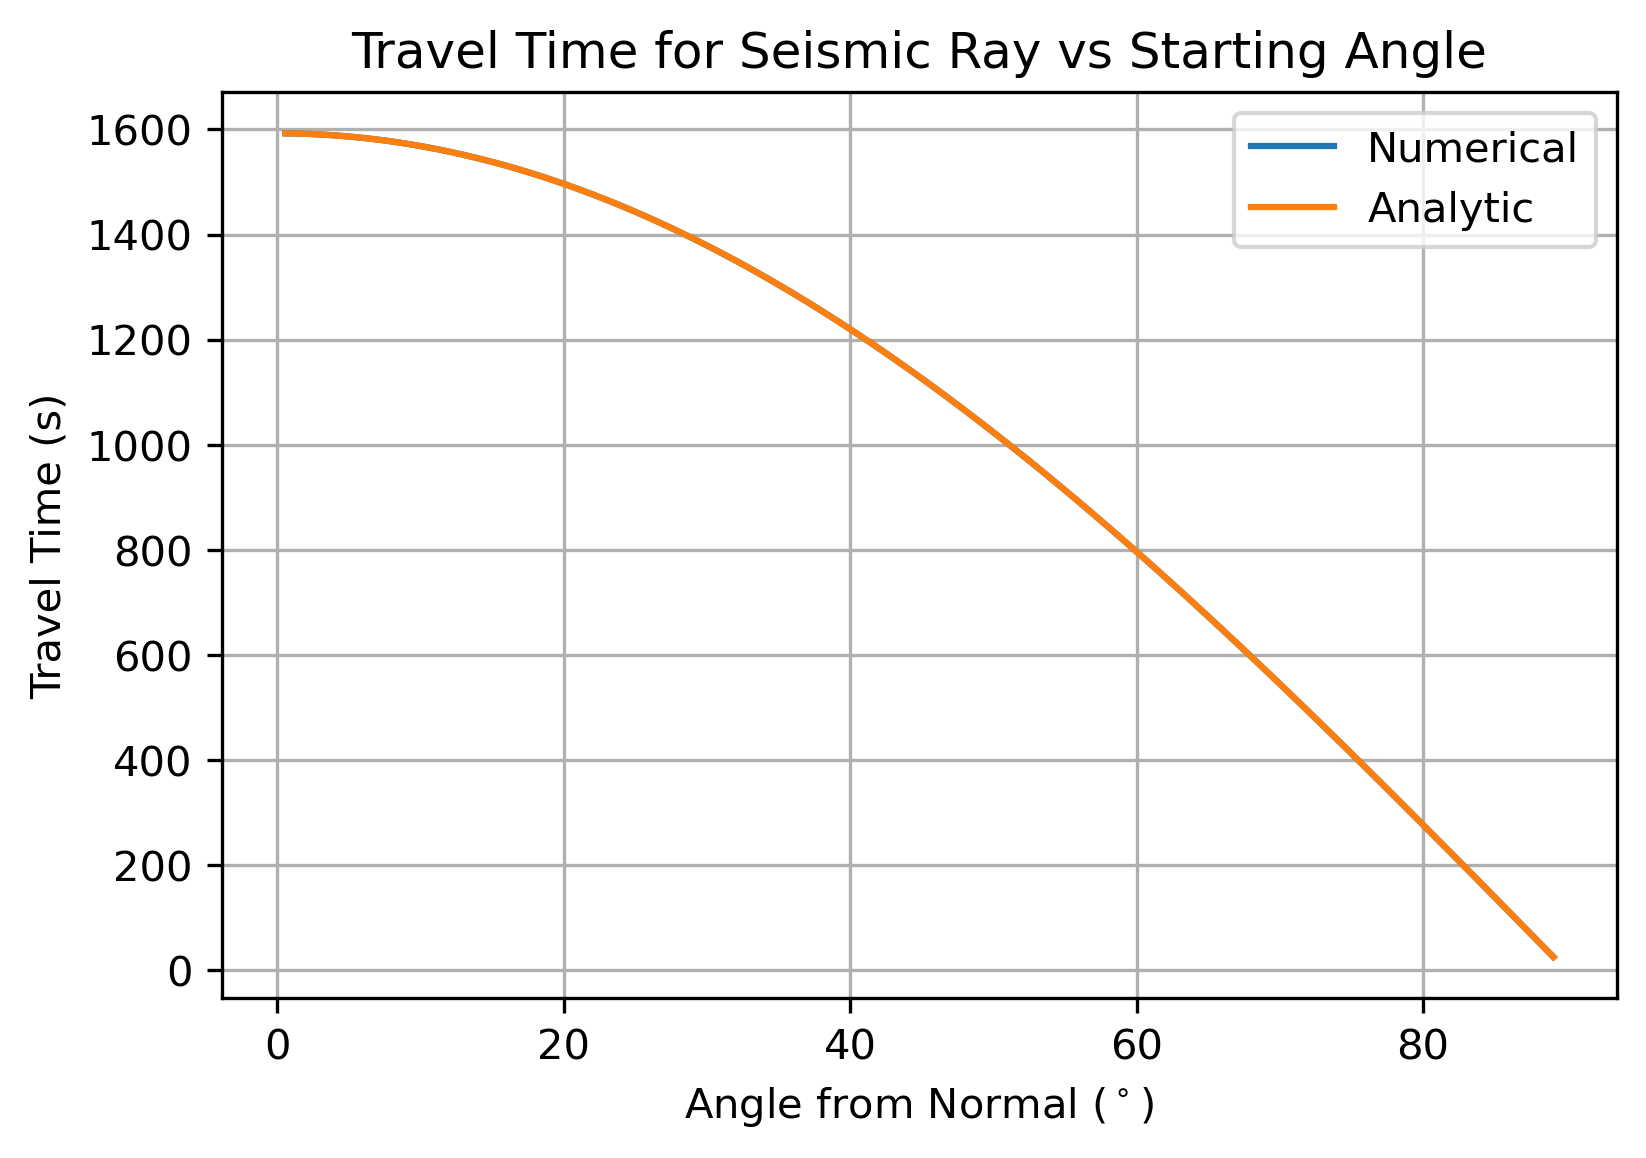

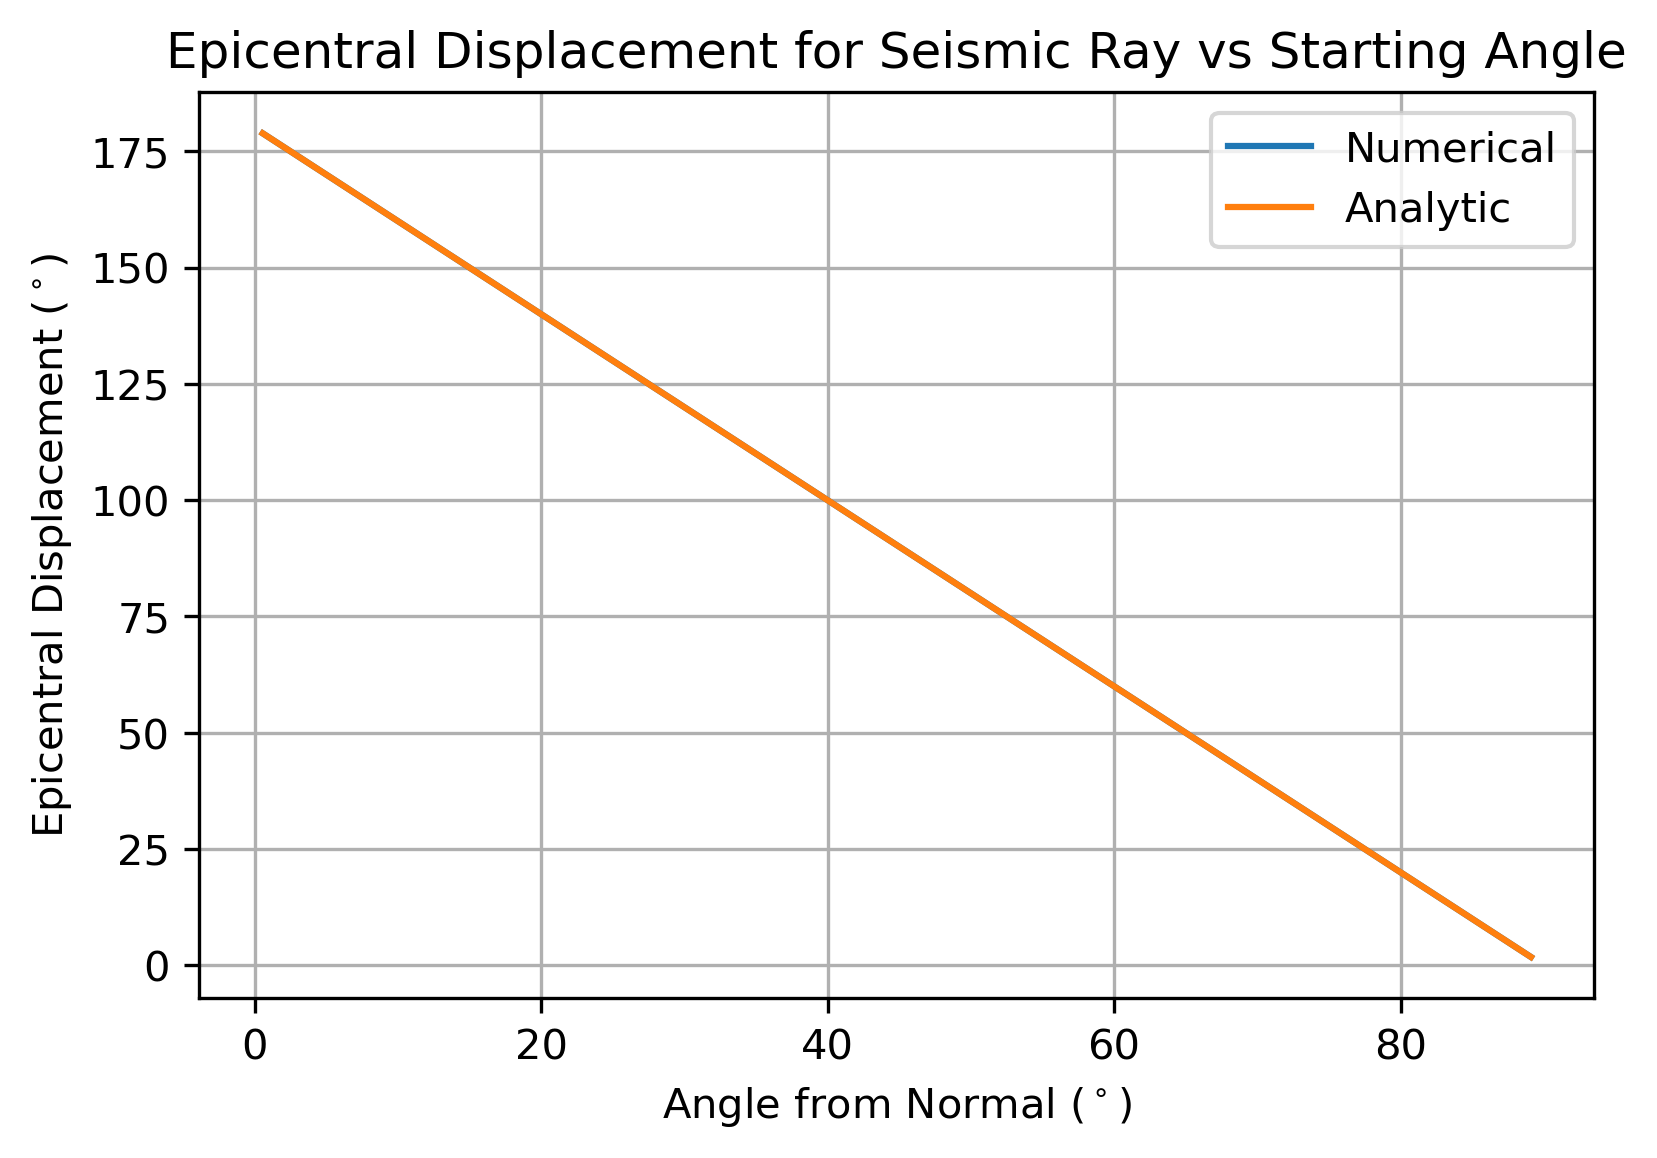

In [35]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

# integrand for the travel time:
def t_integrand(r, c, p):
    return (2*r/c)/np.sqrt(r**2-(c*p)**2)

def d_integrand(r, c, p):
    return (2*p*c/r)/np.sqrt(r**2-(c*p)**2)

c = 8 # km/s
R = 6371 # radius in km

t = [] # travel times
d = [] # for your epicentral distances
t_udias = [] # for your theoretical values of t
d_udias = [] # for your theoretical values of d
angles = np.linspace(0.01,0.99*np.pi/2,100) # (almost) all angles, just avoiding some singularities

for angle in angles:
    p = R*np.sin(angle)/c
    t.append(quad(t_integrand, p*c, R, args=(c,p))[0])
    # Add theoretical solution:
    
    t_udias.append(2/c*np.sqrt(R**2 - p**2*c**2))
    
    d.append(quad(d_integrand, p*c, R, args=(c,p))[0]*180/np.pi)
    d_udias.append(2*np.arccos(p*c/R)*180/np.pi)

# now do the same for the numerical and theoretical epicentral distance as a function of take-off angle

t = np.array(t)
d = np.array(d)

plt.figure(dpi=300)
plt.grid()
plt.plot(angles*180/np.pi, t, label='Numerical')
plt.plot(angles*180/np.pi, t_udias, label='Analytic')
plt.title('Travel Time for Seismic Ray vs Starting Angle')
plt.xlabel('Angle from Normal ($^\circ$)')
plt.ylabel('Travel Time (s)')
plt.legend()
plt.show()

plt.figure(dpi=300)
plt.grid()
plt.plot(angles*180/np.pi, d, label='Numerical')
plt.plot(angles*180/np.pi, d_udias, label='Analytic')
plt.title('Epicentral Displacement for Seismic Ray vs Starting Angle')
plt.xlabel('Angle from Normal ($^\circ$)')
plt.ylabel('Epicentral Displacement ($^\circ$)')
plt.legend()
plt.show()

d = d*np.pi/180

#### **Question 4**

Now make a plot of travel time as a function of epicentral distance.

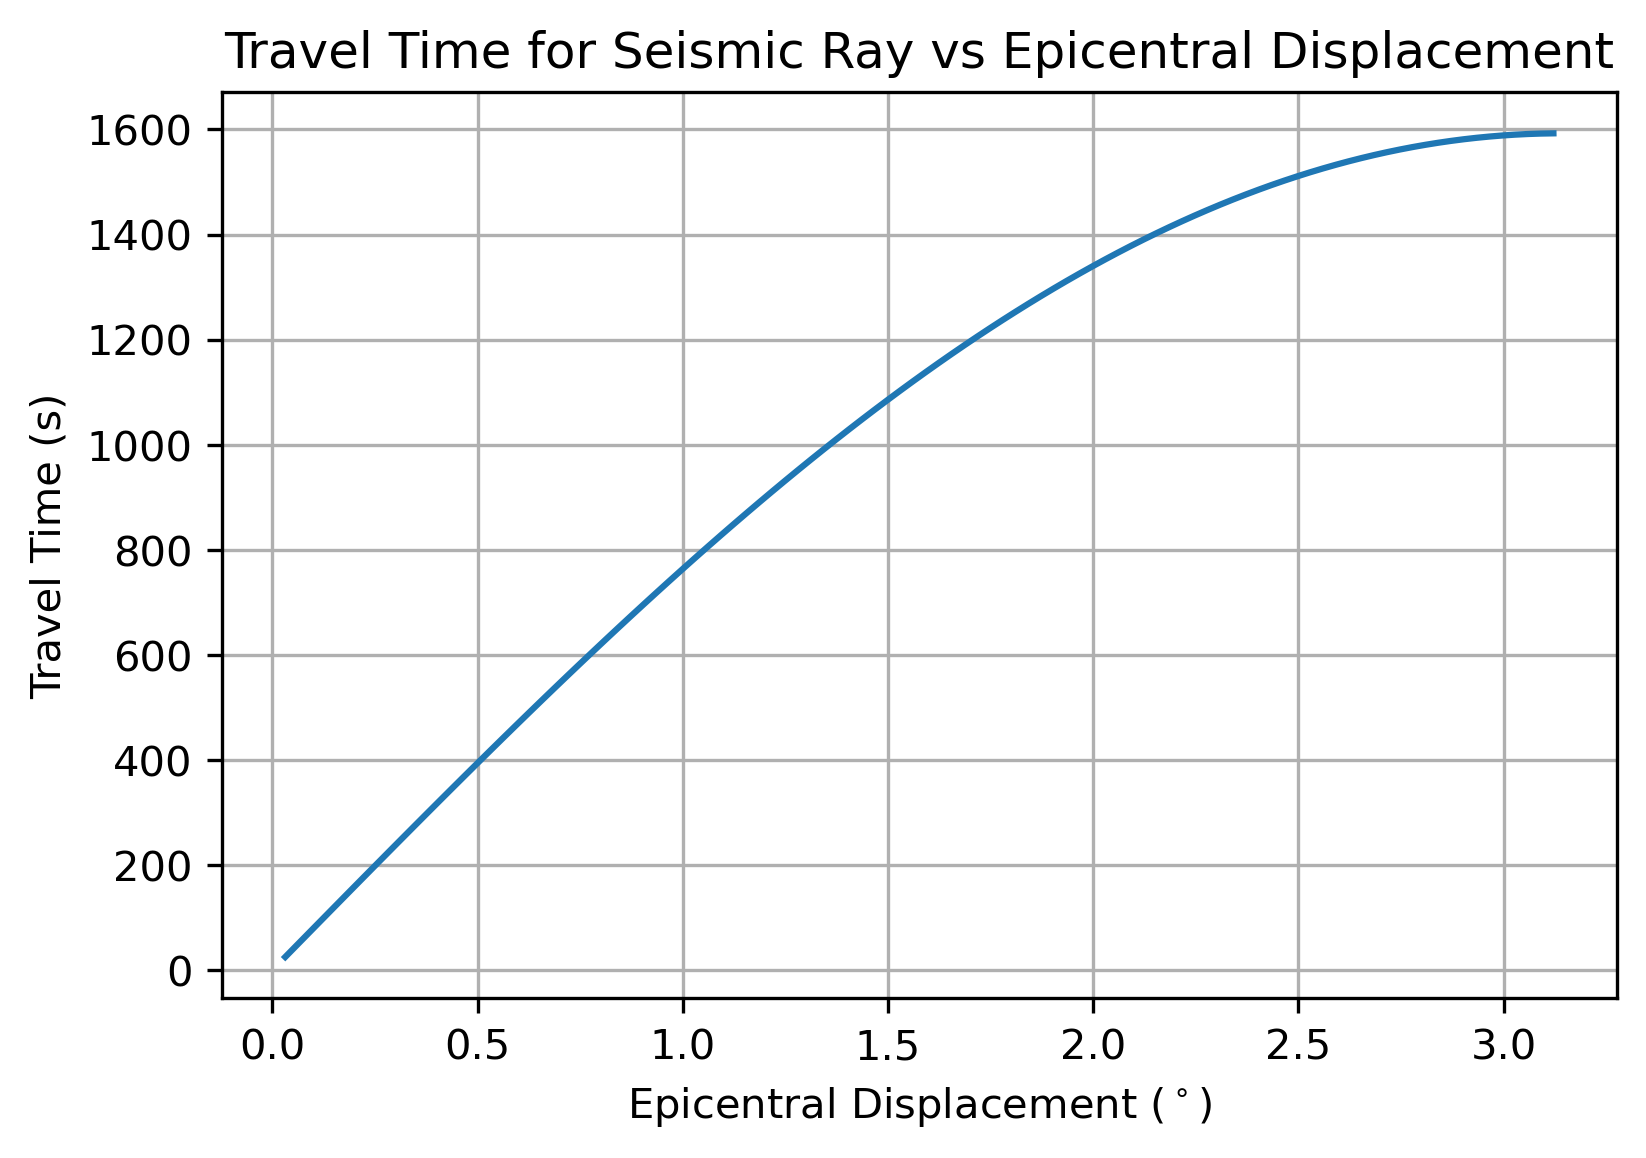

In [36]:
plt.figure(dpi=300)
plt.grid()
plt.plot(d, t)
plt.title('Travel Time for Seismic Ray vs Epicentral Displacement')
plt.xlabel('Epicentral Displacement ($^\circ$)')
plt.ylabel('Travel Time (s)')
plt.show()


This plot is not quite linear, because the speed is constant, but the epicentral distance is an arc. But how about plotting travel time $T$ as a function of ray length $s$, using the sine rule $$\frac{s}{\sin(\Delta)} = \frac{R}{\sin\left(i\right)} = \frac{R}{\sin\left(\frac{\pi-\Delta}{2}\right)},$$
because:

![Figure 4](https://auckland.figshare.com/ndownloader/files/14777429)

#### **Question 5**

Adjust your code from the previous question to make the plot linear.

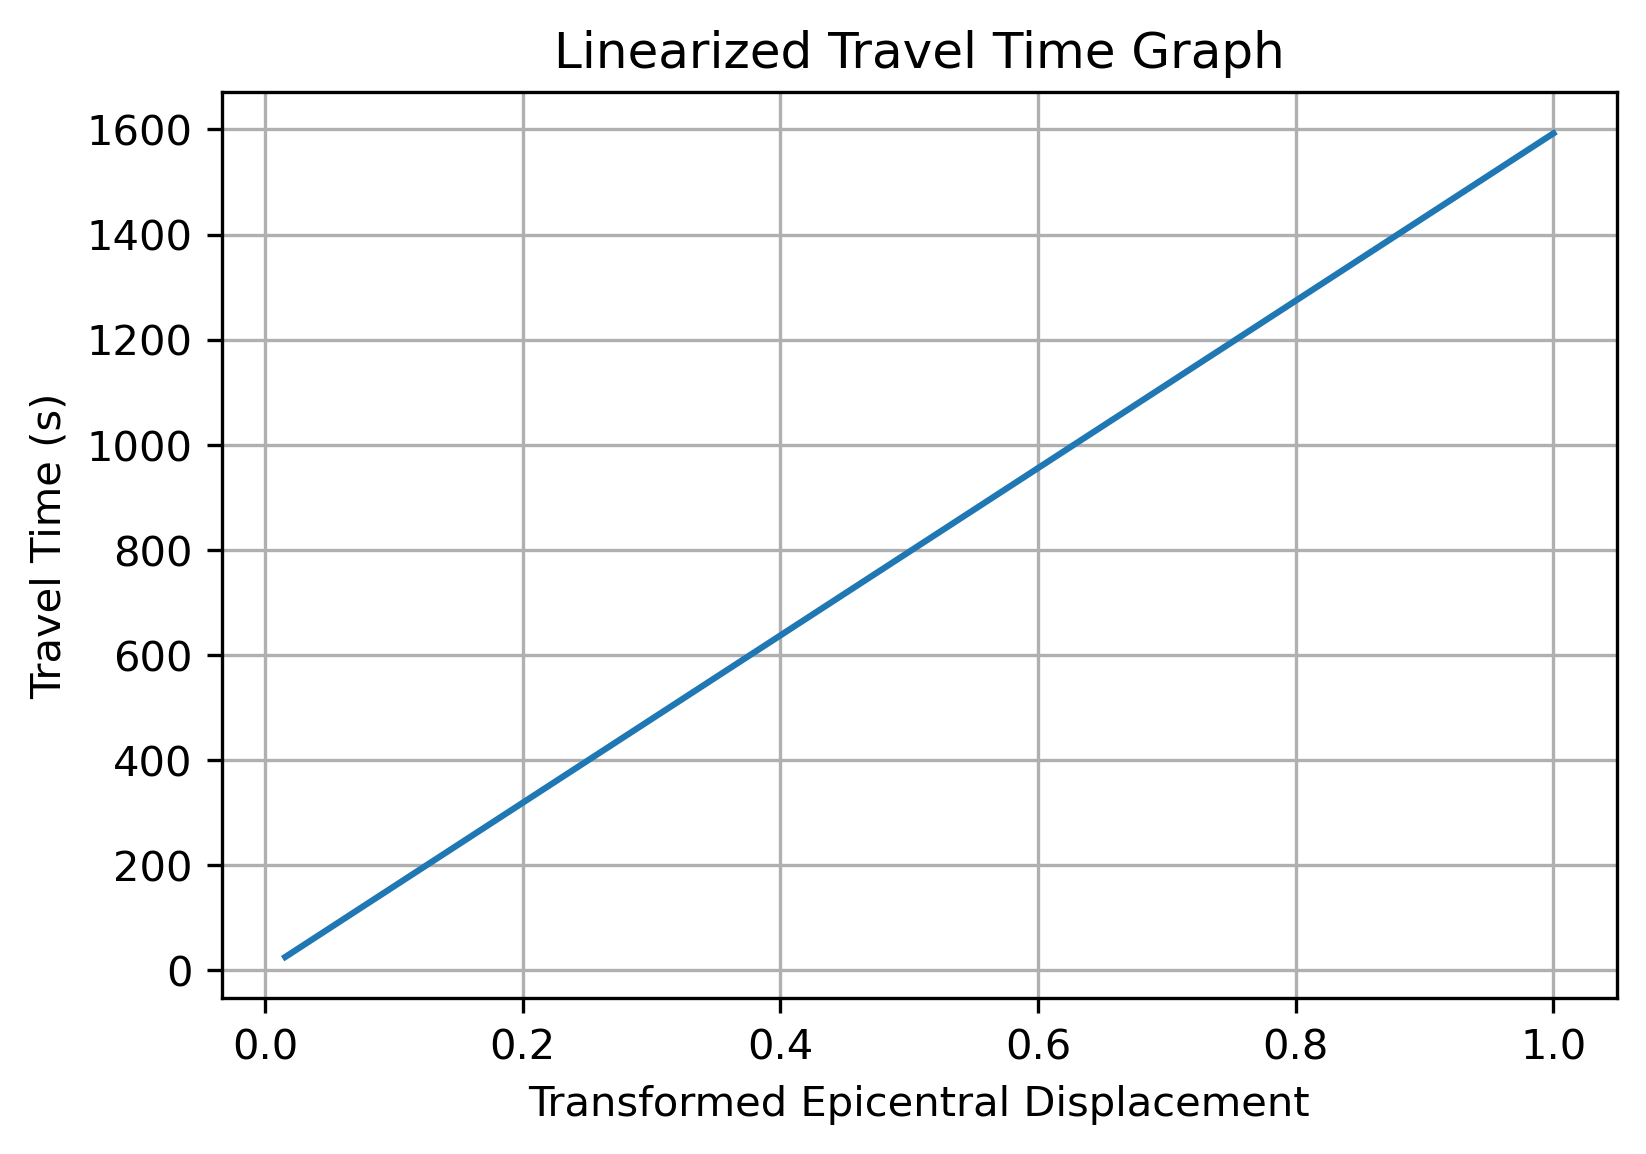

In [37]:
d_t = np.sin(d/2)

plt.figure(dpi=300)
plt.grid()
plt.plot(d_t, t)
plt.title('Linearized Travel Time Graph')
plt.xlabel('Transformed Epicentral Displacement')
plt.ylabel('Travel Time (s)')
plt.show()

Now we observe -- as expected -- that for a sphere with a constant wave speed, the travel time is linear with the length of the ray! 

#### **Question 6**
So far, we did not discuss the kind of waves that have these rays. In the Earth, we generally have two kinds of waves that travel through the volume: P- and S-waves. Your task: discuss the polarization of these two. Why are they called P- and S-wave? Hint: the equations for the P- and S-wave speeds hold the key to answering this question. Quote them in your report and discuss the three parameters in these definitions (assuming an isotropic medium).

<p style="color:red">Answer: In report, page 1, section 2.</p>

## **PREM**

In the Earth, the seismic wave speed varies with depth. For example, there is a sudden drop in wave speed (due to a phase change) from the outer to the inner core. More realistic P- and S-wave speeds as a function of the depth, based on seismic observations, are captured in the [Preliminary Reference Earth Model (PREM)](https://en.wikipedia.org/wiki/Preliminary_reference_Earth_model):

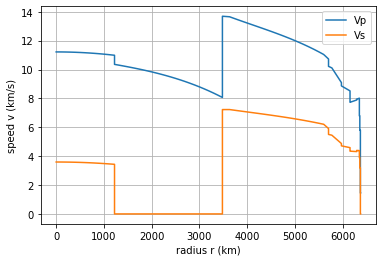

In [6]:
import pandas as pd

url = "http://ds.iris.edu/files/products/emc/data/PREM/PREM_ANISOTROPIC.csv"
c = pd.read_csv(url, usecols=[0,2,3], names=['radius', 'vP','vS'], header=None)
vp = np.array(c['vP'])/1000
vs = np.array(c['vS'])/1000
r = np.array(c['radius'])/1000
plt.plot(r,vp,label='Vp')
plt.plot(r,vs,label='Vs')
plt.xlabel('radius r (km)')
plt.ylabel('speed v (km/s)')
plt.grid()
plt.legend()
plt.show()

Let's estimate the P-wave travel time as a function of epicentral distance based on this $v_p(r)$ and the integrals presented at the start of this notebook. But first, we must interpolate the PREM-supplied $v_p(r)$ to get a regularly spaced 1D array.

#### **Question 7**
Use the `scipy.interpolate.interp1d` function to obtain an array of velocities at 1 km spacings of radius. Plot the interpolated line with the original $r$ and $v_p$ values from above, and include a legend.

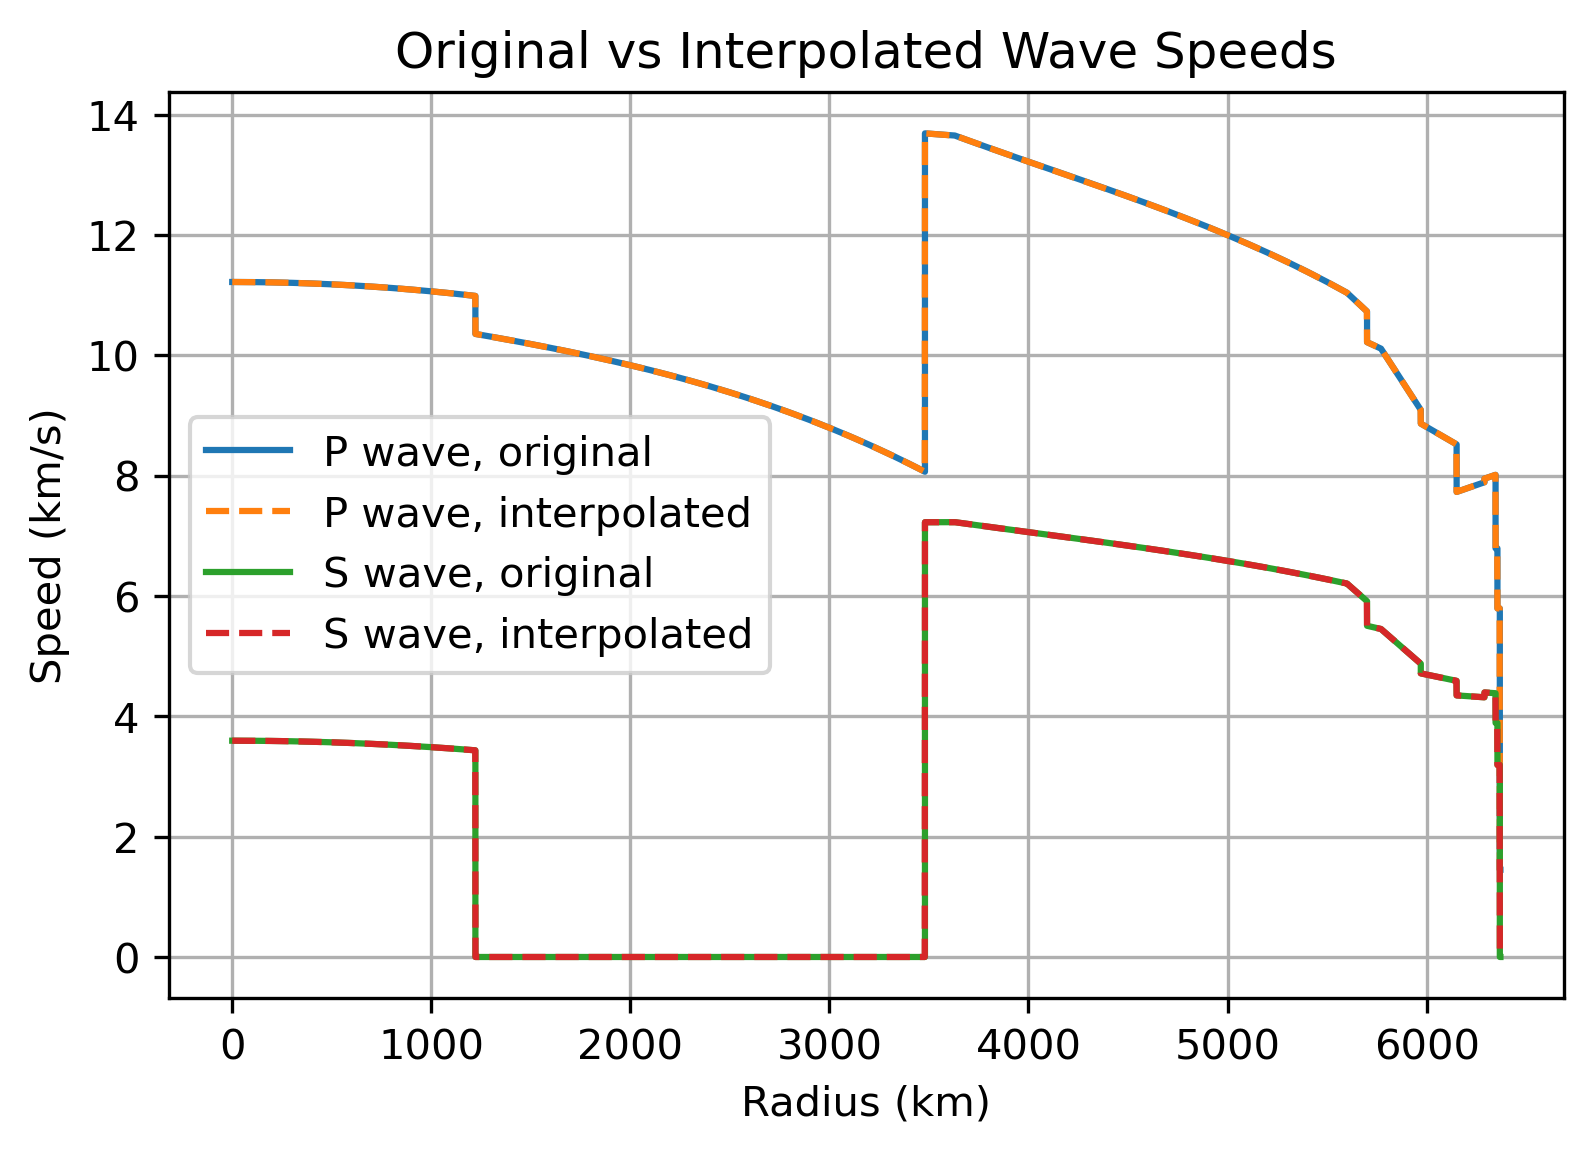

In [7]:
# Write your code in this cell block:
from scipy.interpolate import interp1d

I_p = interp1d(r, vp)
I_s = interp1d(r, vs)

R = r[-1]
spacing = 1
n = int(R/spacing)
vpi = np.zeros(n)
vsi = np.zeros(n)
ri = np.arange(r[0], r[-1], spacing)
for i in range(n):
    vpi[i] = I_p(i*spacing)
    vsi[i] = I_s(i*spacing)

plt.figure(dpi=300)
plt.plot(r, vp, label='P wave, original')
plt.plot(ri, vpi, '--', label='P wave, interpolated')
plt.plot(r, vs, label='S wave, original')
plt.plot(ri, vsi, '--', label='S wave, interpolated')
plt.grid()
plt.xlabel('Radius (km)')
plt.ylabel('Speed (km/s)')
plt.title('Original vs Interpolated Wave Speeds')
plt.legend()
plt.show()

In order to estimate travel times, we could simply calculate the [Riemann sums](https://en.wikipedia.org/wiki/Riemann_sum) of the PREM velocity model for the (regular) $v_p(r)$. However, it turns out that we need some more sophisticated methods to accurately evaluate the integrals for the travel time. In the next part of the lab, we will use readily written code based on the (delay-time $\tau$, ray parameter $p$)-domain, originally proposed by Buland and Chapman (1983), coded up in the [Taup toolkit](https://www.seis.sc.edu/taup/), and then wrapped in [ObsPy](https://github.com/obspy/obspy/wiki). This will enable us to calculate ray paths and travel times using the PREM velocity model.

# **Tracing your own seismic ray paths through the Earth**

The software we use for ray tracing in the Earth is called [“TauP”](https://pubs.geoscienceworld.org/ssa/srl/article/70/2/154/142385/the-taup-toolkit-flexible-seismic-travel-time-and). Information about the package, including the manual can be downloaded [here](http://www.seis.sc.edu/TauP/). This code should run in the notebook on Colab, but you are welcome to run the code locally on a lab computer or laptop. First, let's install and import the required libraries (this may take a minute or two on Colab): 

You could run TauP standalone, but [obspy](https://docs.obspy.org/) provides a Python class called
Taup, which comes with a function [plot_ray_paths](https://docs.obspy.org/packages/autogen/obspy.taup.tau.plot_ray_paths.html#obspy.taup.tau.plot_ray_paths).

This function can be used like this:

There were rays for all but the following epicentral distances:
 [0.0, 105.0, 120.0, 135.0, 150.0, 165.0, 180.0, 195.0, 210.0, 225.0, 240.0, 255.0, 360.0]


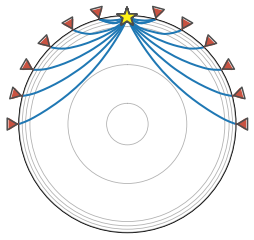

<PolarAxesSubplot:>

In [9]:
from obspy.taup.tau import plot_ray_paths
plot_ray_paths(source_depth=100,phase_list=['P'],npoints=25, verbose=True)

#### **Question 8**
Plot S- and P- wave arrivals from 0 to 360 degrees. Why are there gaps (shadows) in the arrivals?

There were rays for all but the following epicentral distances:
 [0.0, 102.85714285714286, 110.20408163265306, 117.55102040816327, 124.89795918367348, 132.24489795918367, 139.59183673469389, 146.9387755102041, 154.28571428571428, 161.6326530612245, 168.9795918367347, 176.3265306122449, 183.67346938775512, 191.0204081632653, 198.3673469387755, 205.71428571428572, 213.06122448979593, 220.40816326530611, 227.75510204081633, 235.10204081632654, 242.44897959183675, 249.79591836734696, 257.14285714285717, 360.0]


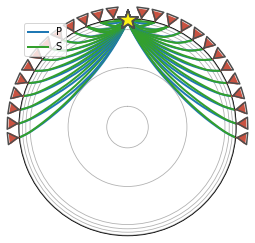

<PolarAxesSubplot:>

In [56]:
plot_ray_paths(source_depth=100, phase_list=['P', 'S'], npoints=50, legend=True, verbose=True)

Besides your plain P- and S-wave phases, there are a host of other — more complicated — seismic ray paths from earthquake to receiver. [This link](http://www.iris.edu/data/vocab.htm) describes the naming conventions.

#### **Question 9**

Plot the PKP arrivals and P-wave arrivals from 0–360 degrees. If we consider PKP a direct compressional arrival, what is the range of the P-wave shadow zone?

There were rays for all but the following epicentral distances:
 [0.0, 7.346938775510204, 102.85714285714286, 110.20408163265306, 117.55102040816327, 124.89795918367348, 132.24489795918367, 139.59183673469389, 220.40816326530611, 227.75510204081633, 235.10204081632654, 242.44897959183675, 249.79591836734696, 257.14285714285717, 352.6530612244898, 360.0]


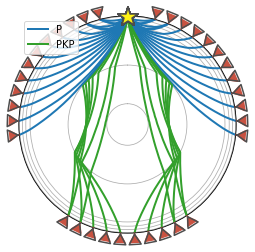

<PolarAxesSubplot:>

In [54]:
plot_ray_paths(source_depth=100, phase_list=['P', 'PKP'], npoints=50, verbose=True, min_degrees=0, max_degrees=360, legend=True)

<p style="color:red">Answer: The shadow zone for P-waves appears to range from $98.1^\circ$ to $144.35^\circ$. Also in report, page 3, section 2.2.1.</p>

#### **Question 10**

Explain with a figure and text why P-waves at smaller epicentral distances (0–35 degrees) appear to cross. To zoom in on the ray paths at smaller epicentral distance, use the option to plot ray paths in a Cartesian coordinate system. *Confirm the same occurs for S-waves*.

There were rays for all but the following epicentral distances:
 []


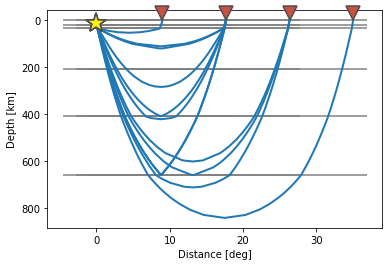

There were rays for all but the following epicentral distances:
 []


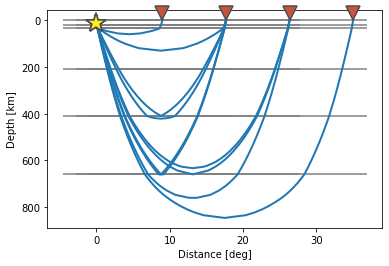

<AxesSubplot:xlabel='Distance [deg]', ylabel='Depth [km]'>

In [87]:
plot_ray_paths(source_depth=10, phase_list=['P'], npoints=4, verbose=True, min_degrees=9, max_degrees=35, \
               plot_type='cartesian')
plot_ray_paths(source_depth=10, phase_list=['S'], npoints=4, verbose=True, min_degrees=9, max_degrees=35, \
               plot_type='cartesian')

<p style="color:red">Answer: In report, page 5, section 2.2.1.</p>

# **The travel times of seismic rays**

The previous tasks involved mainly the spatial distribution of seismic ray paths in the earth. One of the simplest examples of using obspy is to create a travel time plot of different seismic phases. For example, if you execute the following three lines of code, the direct S-wave arrival time as a function of epicentral distance appears:

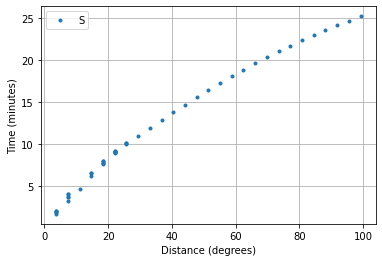

<AxesSubplot:xlabel='Distance (degrees)', ylabel='Time (minutes)'>

In [63]:
from obspy.taup import plot_travel_times
plot_travel_times(source_depth=10, phase_list=["S"])

#### **Question 11**

Draw a single plot that contains the travel-time curves for P, S, SS, and PP arrivals at 100 points between 0 and 90 degrees epicentral distance.

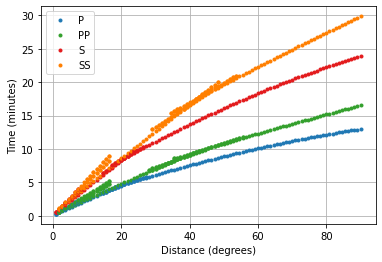

<AxesSubplot:xlabel='Distance (degrees)', ylabel='Time (minutes)'>

In [16]:
plot_travel_times(source_depth=10, phase_list=['P', 'S', 'SS', 'PP'], npoints=100, min_degrees=0, max_degrees=90)

<h2>Questions 12-19</h2>

The rest of the questions were all related to code, and it was much easier to simply write a full cell containing all of the code for each part. Note also that, for most variables, the presence of a 1, 2 or 3 after the variable refers to the 1st, 2nd or 3rd station.

Seismograms for SNZO:

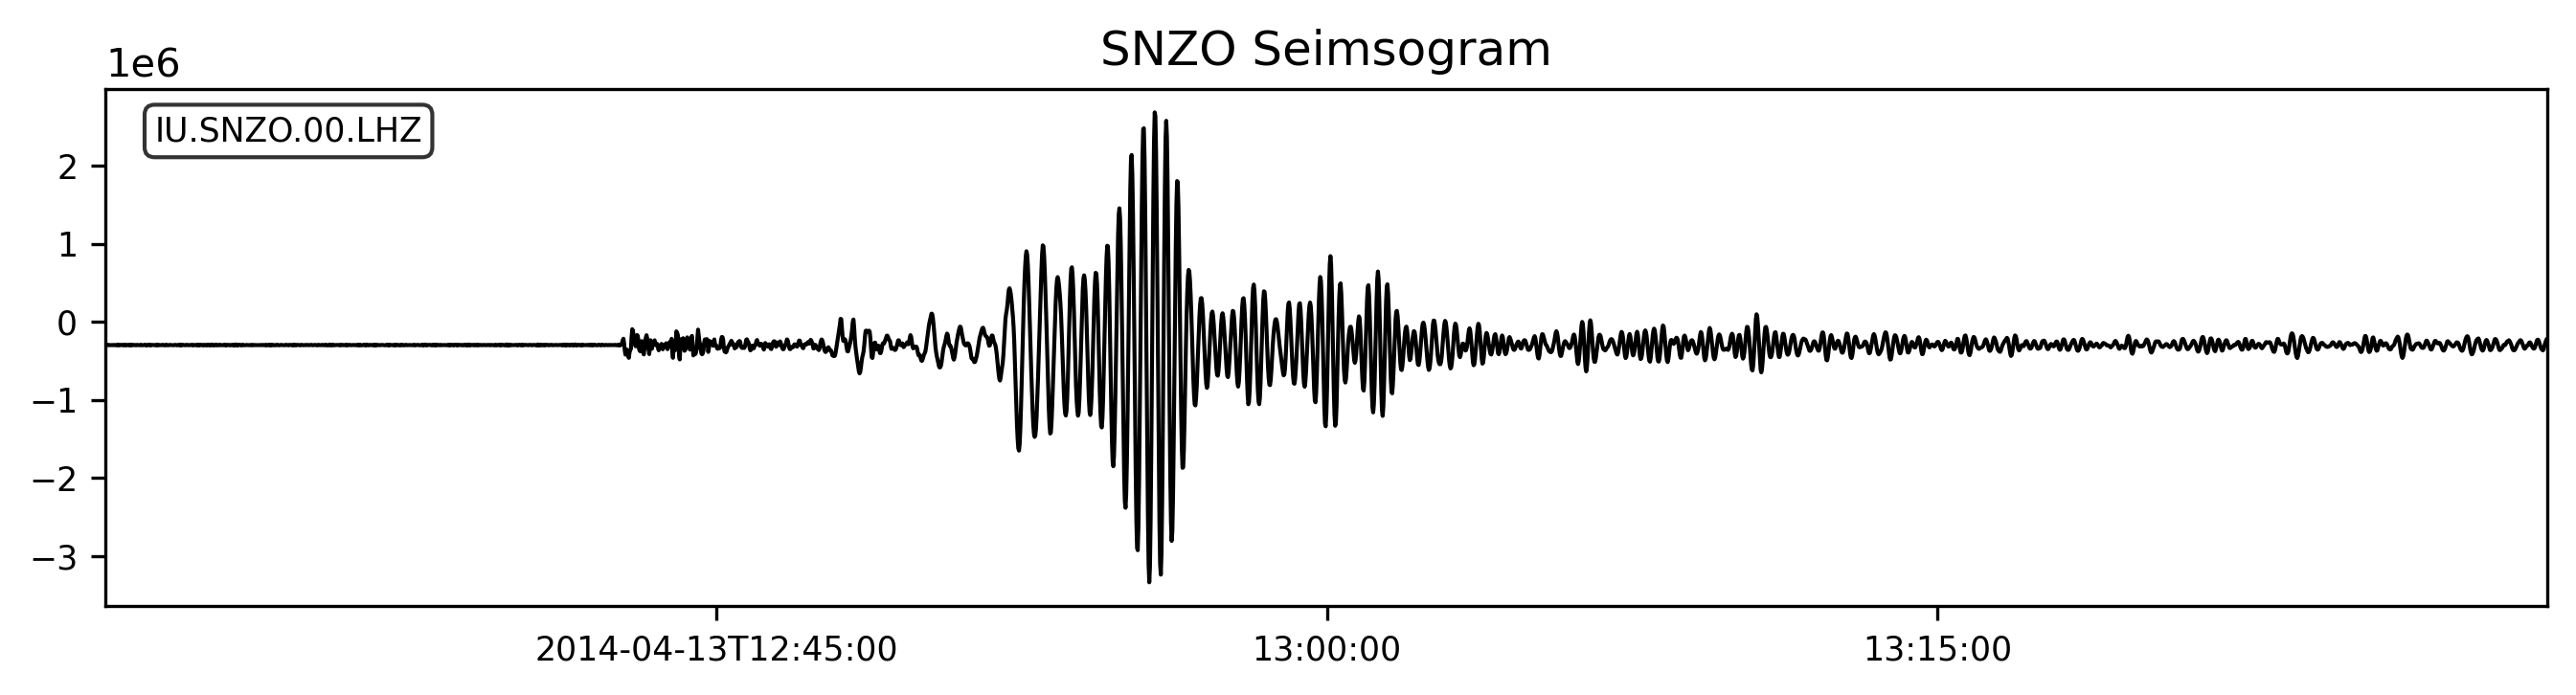

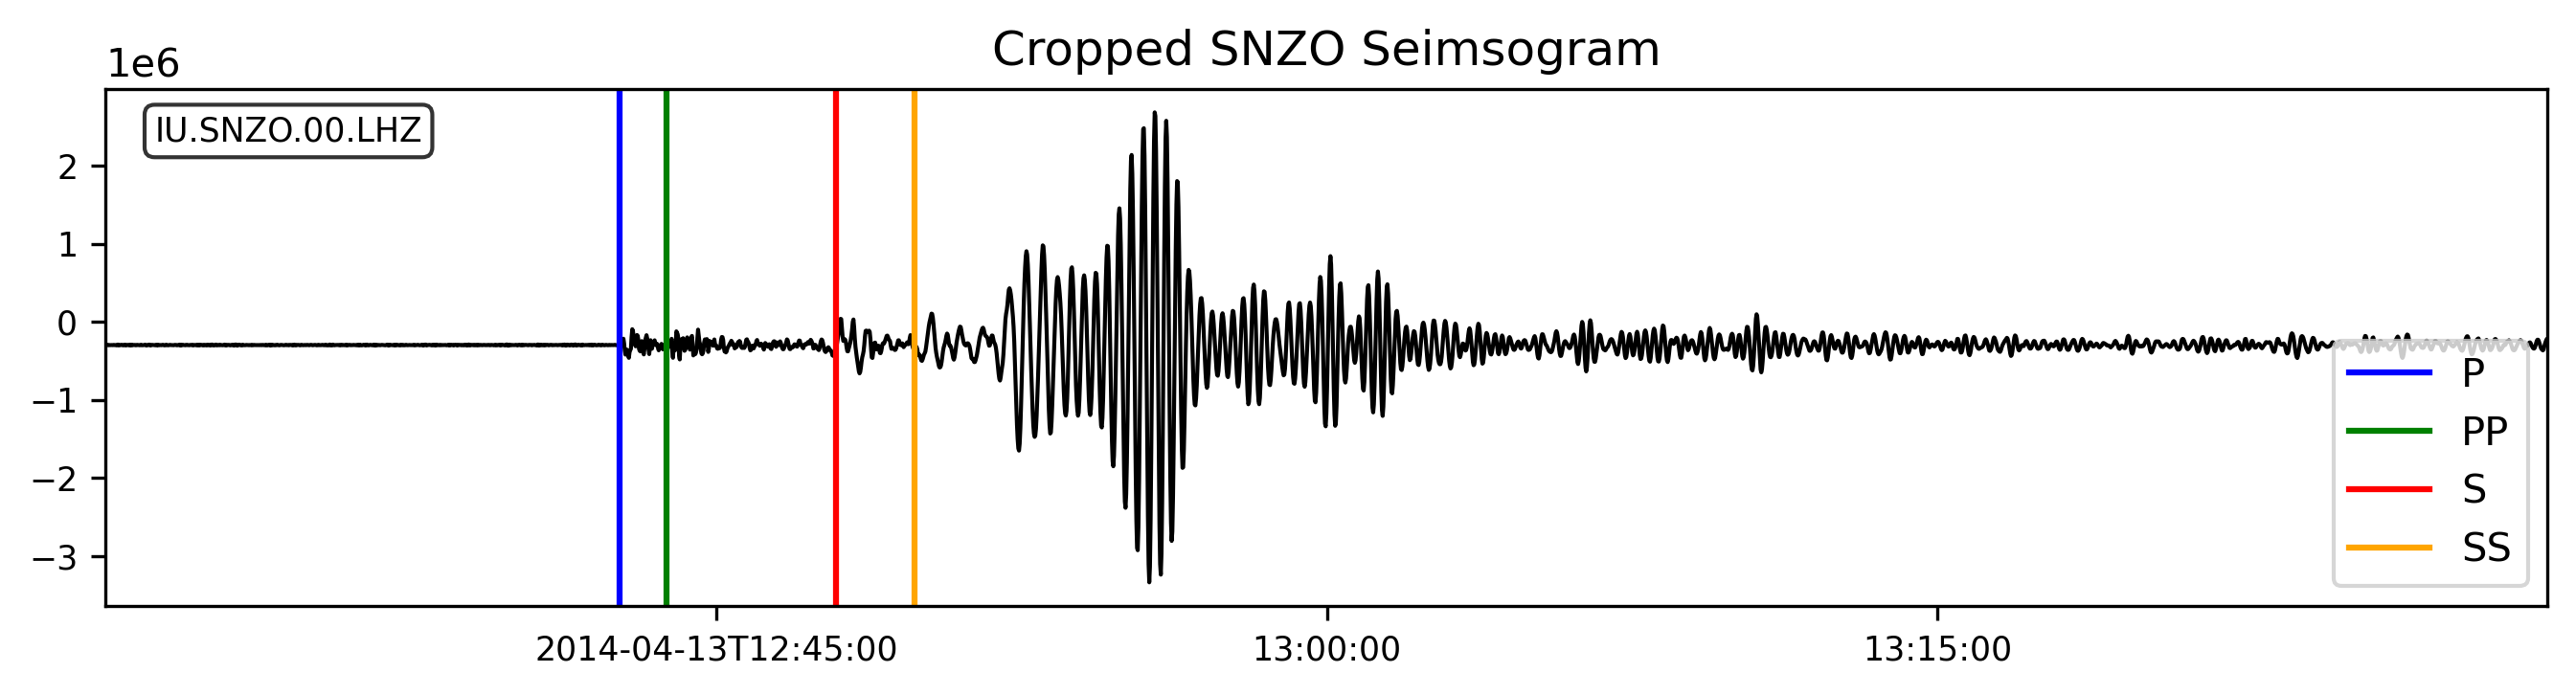

In [88]:
client = Client("IRIS")
t1 = UTCDateTime('2014-04-13T12:30:00.00')
t2 = t1 + 3600
st1 = client.get_waveforms("IU", "SNZO", "00", "LHZ", t1, t2)  #in later parts, you can ex-change SNZO.

arrival_P1 = UTCDateTime('2014-04-13T12:42:38Z')
arrival_PP1 = UTCDateTime('2014-04-13T12:43:46Z')
arrival_S1 = UTCDateTime('2014-04-13T12:47:56Z')
arrival_SS1 = UTCDateTime('2014-04-13T12:49:52Z')

fig = plt.figure(dpi=300, figsize=(10, 3))
st1.plot(fig=fig)
ax = fig.gca()
plt.title('SNZO Seimsogram')
plt.show()

fig = plt.figure(dpi=300, figsize=(10,3))
st1.plot(fig=fig)
ax = fig.gca()
ax.axvline(x=arrival_P1.datetime, label='P', color='blue')
ax.axvline(x=arrival_PP1.datetime, label='PP', color='green')
ax.axvline(x=arrival_S1.datetime, label='S', color='red')
ax.axvline(x=arrival_SS1.datetime, label='SS', color='orange')
plt.title('Cropped SNZO Seimsogram') # Note that this was originally in Spyder, where the figure could be visually cropped.
plt.legend(loc='lower right')
plt.show()

Travel time graph for SNZO:

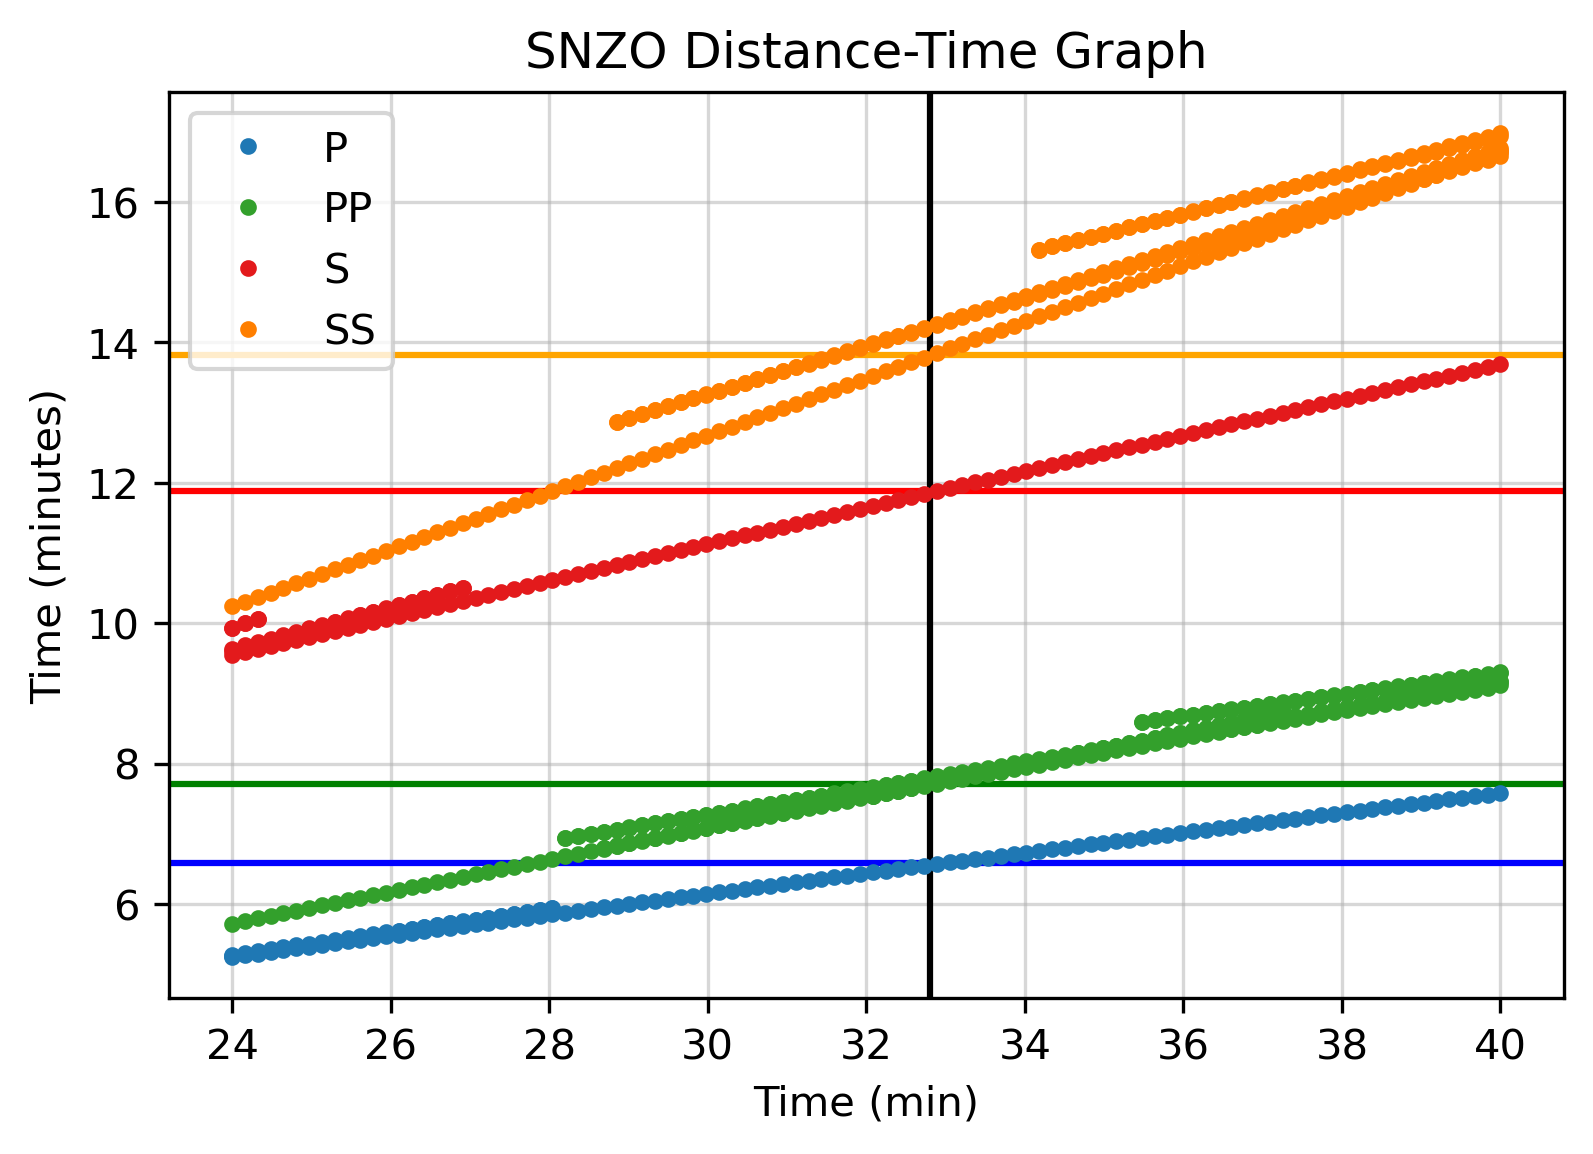

In [89]:
# These values were not estimated outright, but instead were honed by running this cell with different estimates 
# multiple times.
t_0_P1 = 6.58 # Arrival of first P-wave; not directly estimatable from seismogram, since the start of the event isn't shown.
delta1 = 32.8 # Epicentral distance.

t_PP_P1 = (arrival_PP1 - arrival_P1)/60 # Time difference between PP arrival and P arrival.
t_S_PP1 = (arrival_S1 - arrival_PP1)/60# Time difference between S arrival and PP arrival.
t_SS_S1 = (arrival_SS1 - arrival_S1)/60# Time difference between SS arrival and S arrival.

fig = plt.figure(dpi=300)
ax = fig.gca()

ax.axhline(y=t_0_P1, color='blue')
ax.axhline(y=t_0_P1+t_PP_P1, color='green')
ax.axhline(y=t_0_P1+t_S_PP1+t_PP_P1, color='red')
ax.axhline(y=t_0_P1+t_S_PP1+t_PP_P1+t_SS_S1, color='orange')

ax.axvline(x=delta1, color='black')

xi = 24
xf = 40
dx = 4

plot_travel_times(source_depth=10, phase_list=['P', 'S', 'SS', 'PP'], npoints=100, min_degrees=xi, max_degrees=xf, \
                  fig=fig, ax=ax, show=False)

# Section commented out was used to zoom in on different y ranges, as well as set grid lines for better estimation.
'''
yi = 6
yf = 8
dy = 0.5

major_ticksx = np.arange(xi, xf, dx)
minor_ticksx = np.arange(xi, xf, dx/4)
major_ticksy = np.arange(yi, yf, dy)
minor_ticksy = np.arange(yi, yf, dy/4)

ax.set_xticks(major_ticksx)
ax.set_xticks(minor_ticksx, minor=True)
ax.set_yticks(major_ticksy)
ax.set_yticks(minor_ticksy, minor=True)
ax.set_ylim(bottom=6, top=8)
'''

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
plt.title('SNZO Distance-Time Graph')
plt.xlabel('Distance ($^\circ$)')
plt.xlabel('Time (min)')
plt.show()

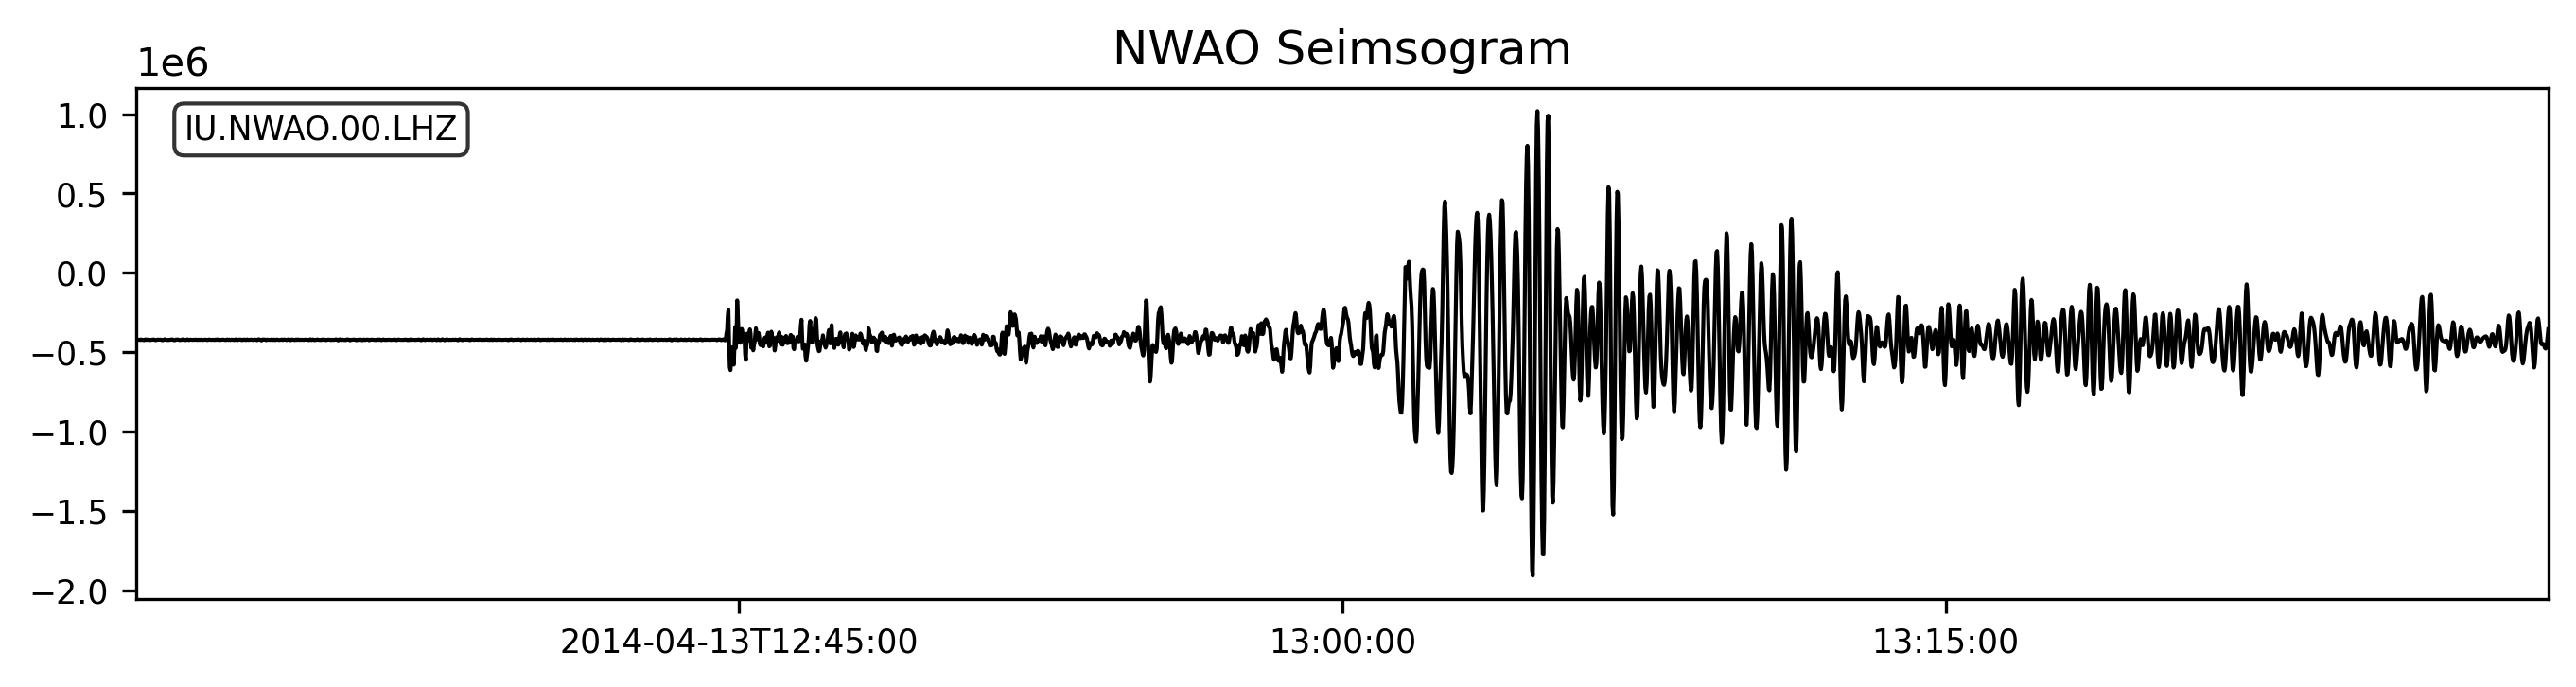

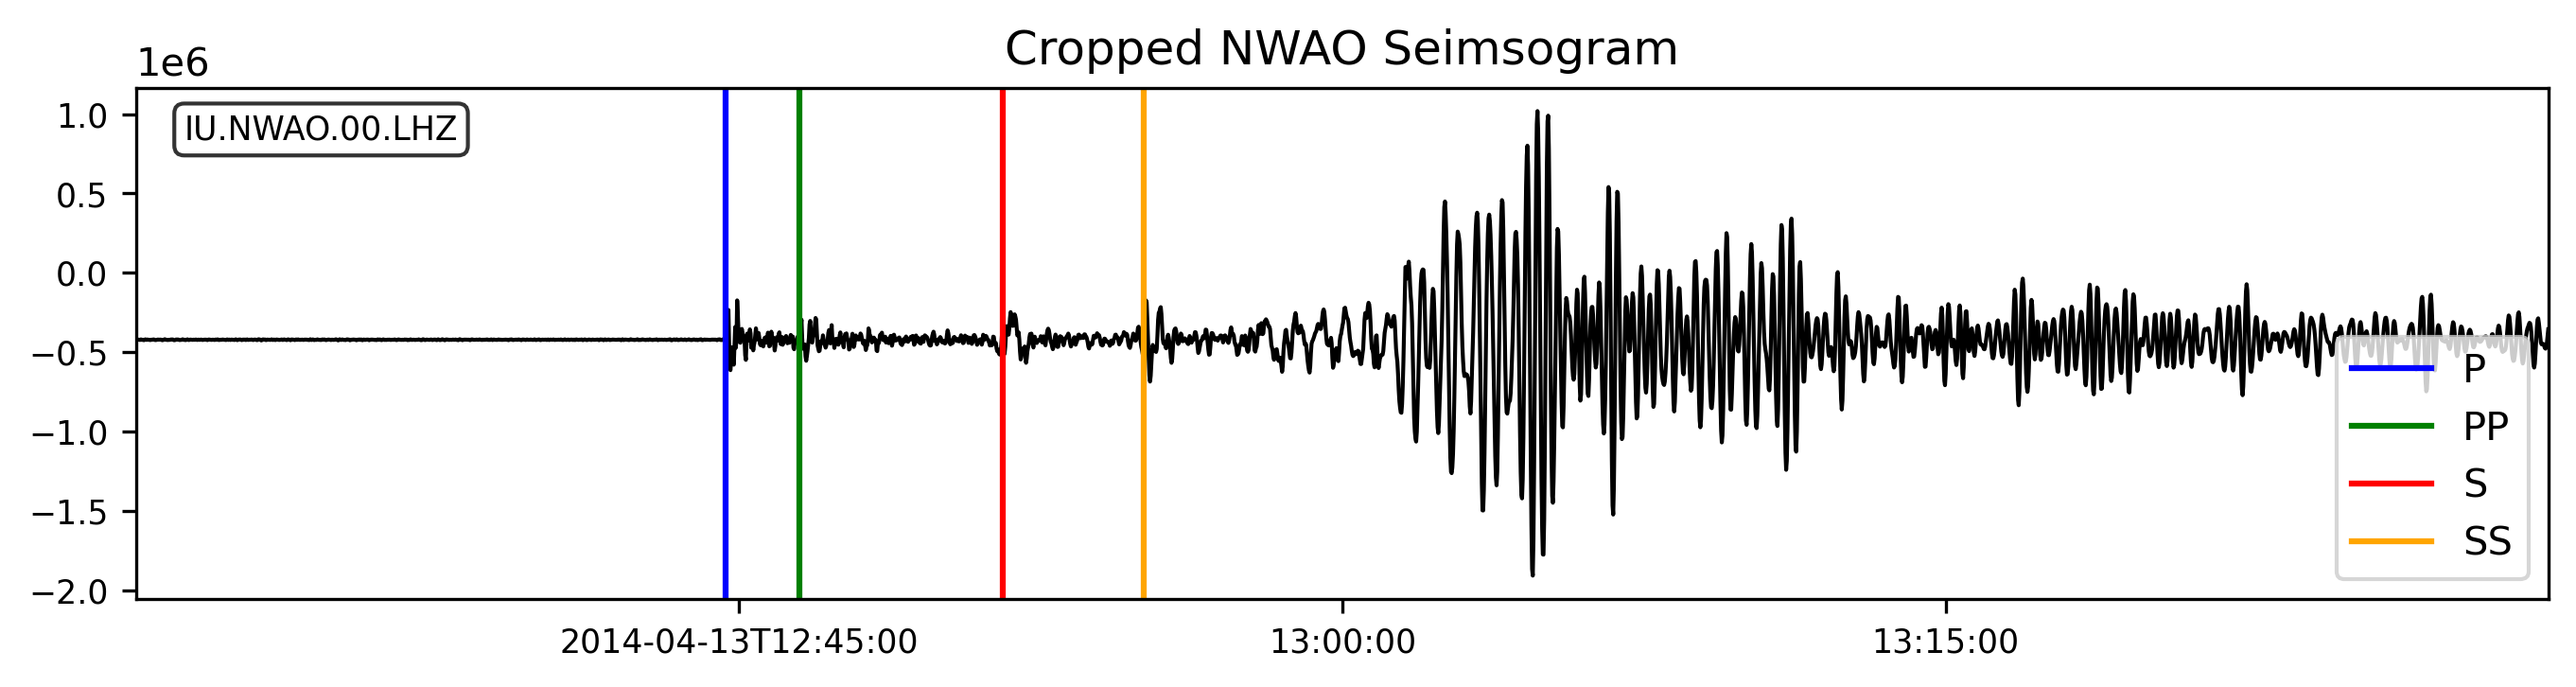

In [90]:
# All of the rest of the code is completely analogous.

st2 = client.get_waveforms("IU", "NWAO", "00", "LHZ", t1, t2)

arrival_P2 = UTCDateTime('2014-04-13T12:44:40Z')
arrival_PP2 = UTCDateTime('2014-04-13T12:46:30Z')
arrival_S2 = UTCDateTime('2014-04-13T12:51:33Z')
arrival_SS2 = UTCDateTime('2014-04-13T12:55:03Z')

fig = plt.figure(dpi=300, figsize=(10, 3))
st2.plot(fig=fig)
ax = fig.gca()
plt.title('NWAO Seimsogram')
plt.show()

fig = plt.figure(dpi=300, figsize=(10, 3))
st2.plot(fig=fig)
ax = fig.gca()
ax.axvline(x=arrival_P2.datetime, label='P', color='blue')
ax.axvline(x=arrival_PP2.datetime, label='PP', color='green')
ax.axvline(x=arrival_S2.datetime, label='S', color='red')
ax.axvline(x=arrival_SS2.datetime, label='SS', color='orange')
plt.legend(loc='lower right')
plt.title('Cropped NWAO Seimsogram')
plt.show()

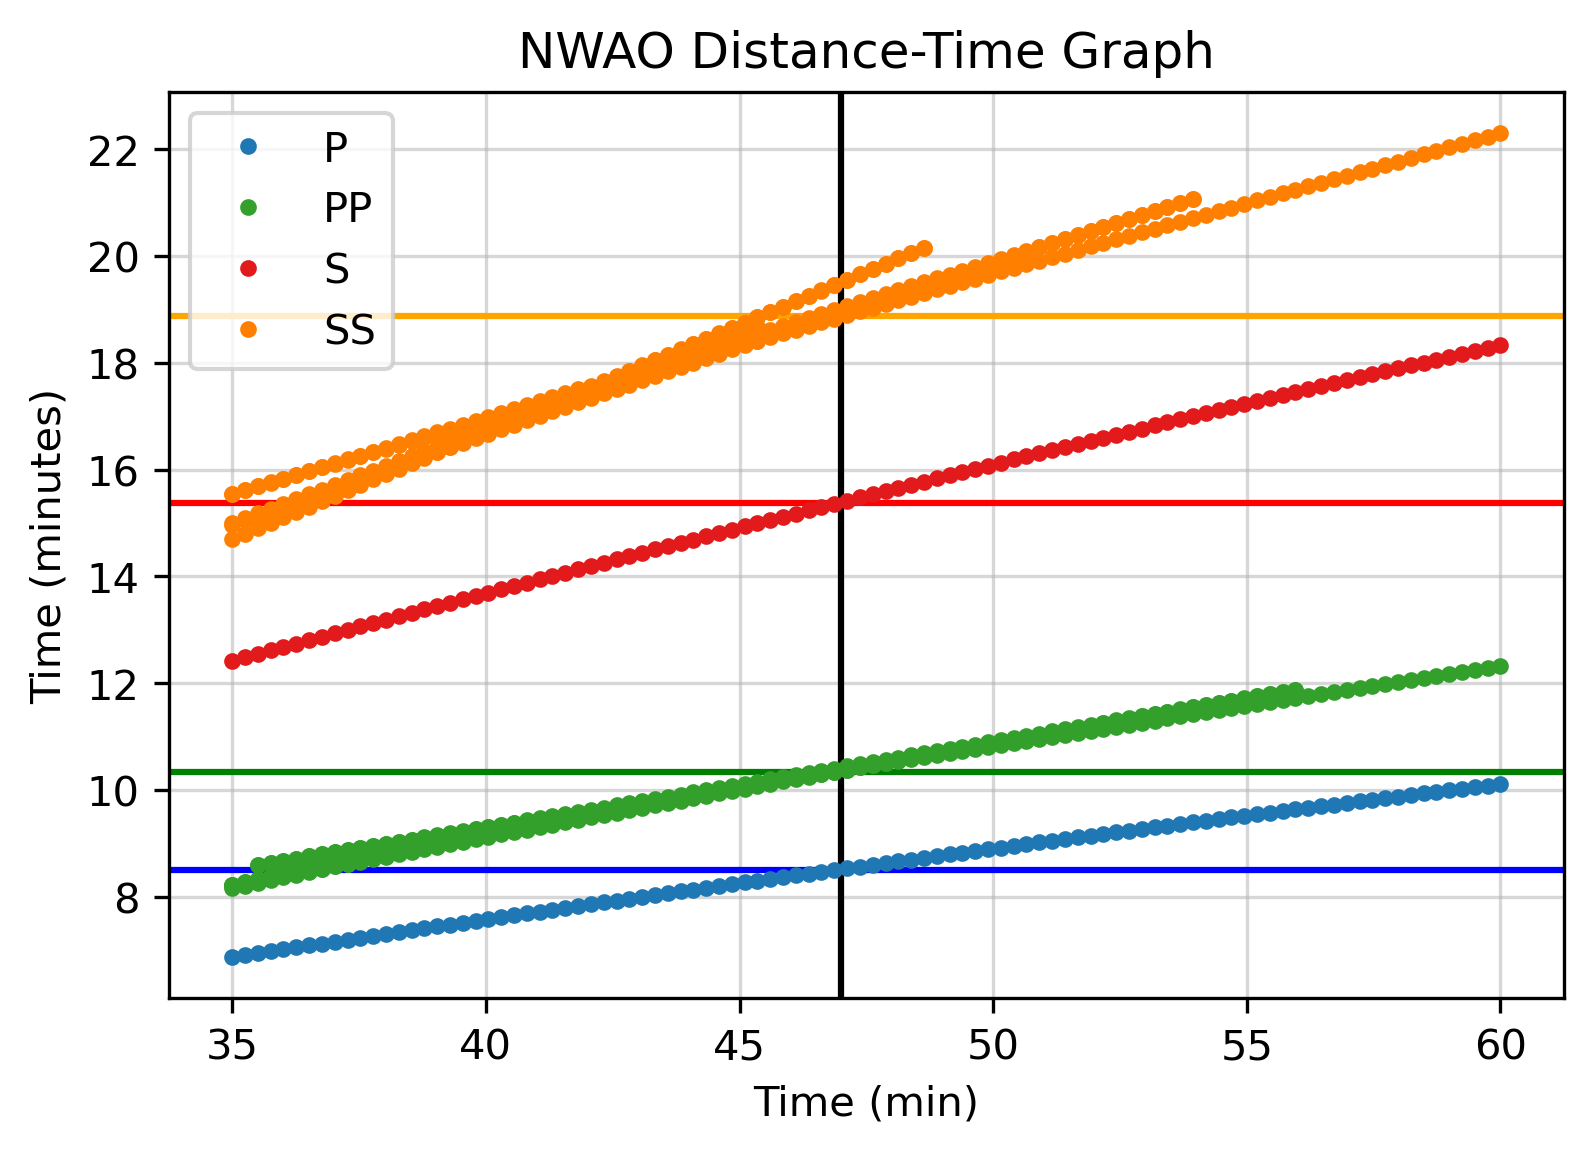

In [91]:
t_0_P2 = 8.5
delta2 = 47

t_PP_P2 = (arrival_PP2 - arrival_P2)/60
t_S_PP2 = (arrival_S2 - arrival_PP2)/60
t_SS_S2 = (arrival_SS2 - arrival_S2)/60

fig = plt.figure(dpi=300)
ax = fig.gca()

ax.axhline(y=t_0_P2, color='blue')
ax.axhline(y=t_0_P2+t_PP_P2, color='green')
ax.axhline(y=t_0_P2+t_S_PP2+t_PP_P2, color='red')
ax.axhline(y=t_0_P2+t_S_PP2+t_PP_P2+t_SS_S2, color='orange')

ax.axvline(x=delta2, color='black')

xi = 35
xf = 60
dx = 4

plot_travel_times(source_depth=10, phase_list=['P', 'S', 'SS', 'PP'], npoints=100, min_degrees=xi, max_degrees=xf,\
                  fig=fig, ax=ax, show=False)

'''
yi = 6
yf = 8
dy = 0.5

major_ticksx = np.arange(xi, xf, dx)
minor_ticksx = np.arange(xi, xf, dx/4)
major_ticksy = np.arange(yi, yf, dy)
minor_ticksy = np.arange(yi, yf, dy/4)

ax.set_xticks(major_ticksx)
ax.set_xticks(minor_ticksx, minor=True)
ax.set_yticks(major_ticksy)
ax.set_yticks(minor_ticksy, minor=True)
ax.set_ylim(bottom=6, top=8)
'''

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
plt.title('NWAO Distance-Time Graph')
plt.xlabel('Distance ($^\circ$)')
plt.xlabel('Time (min)')
plt.show()

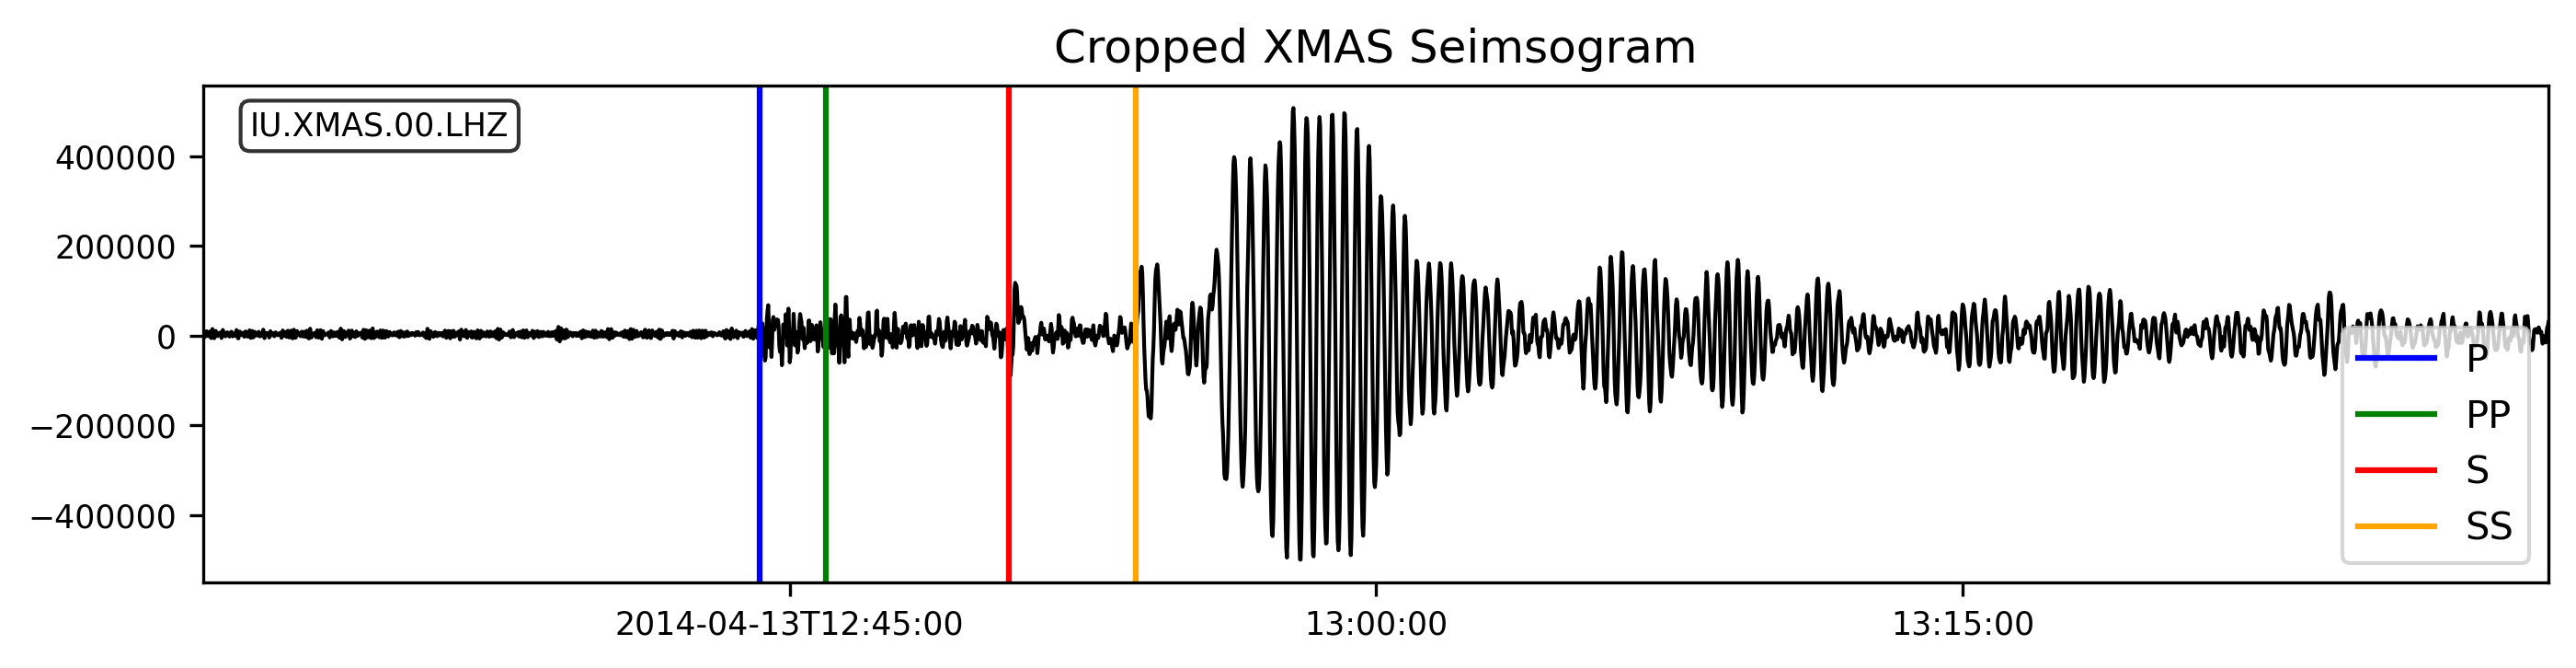

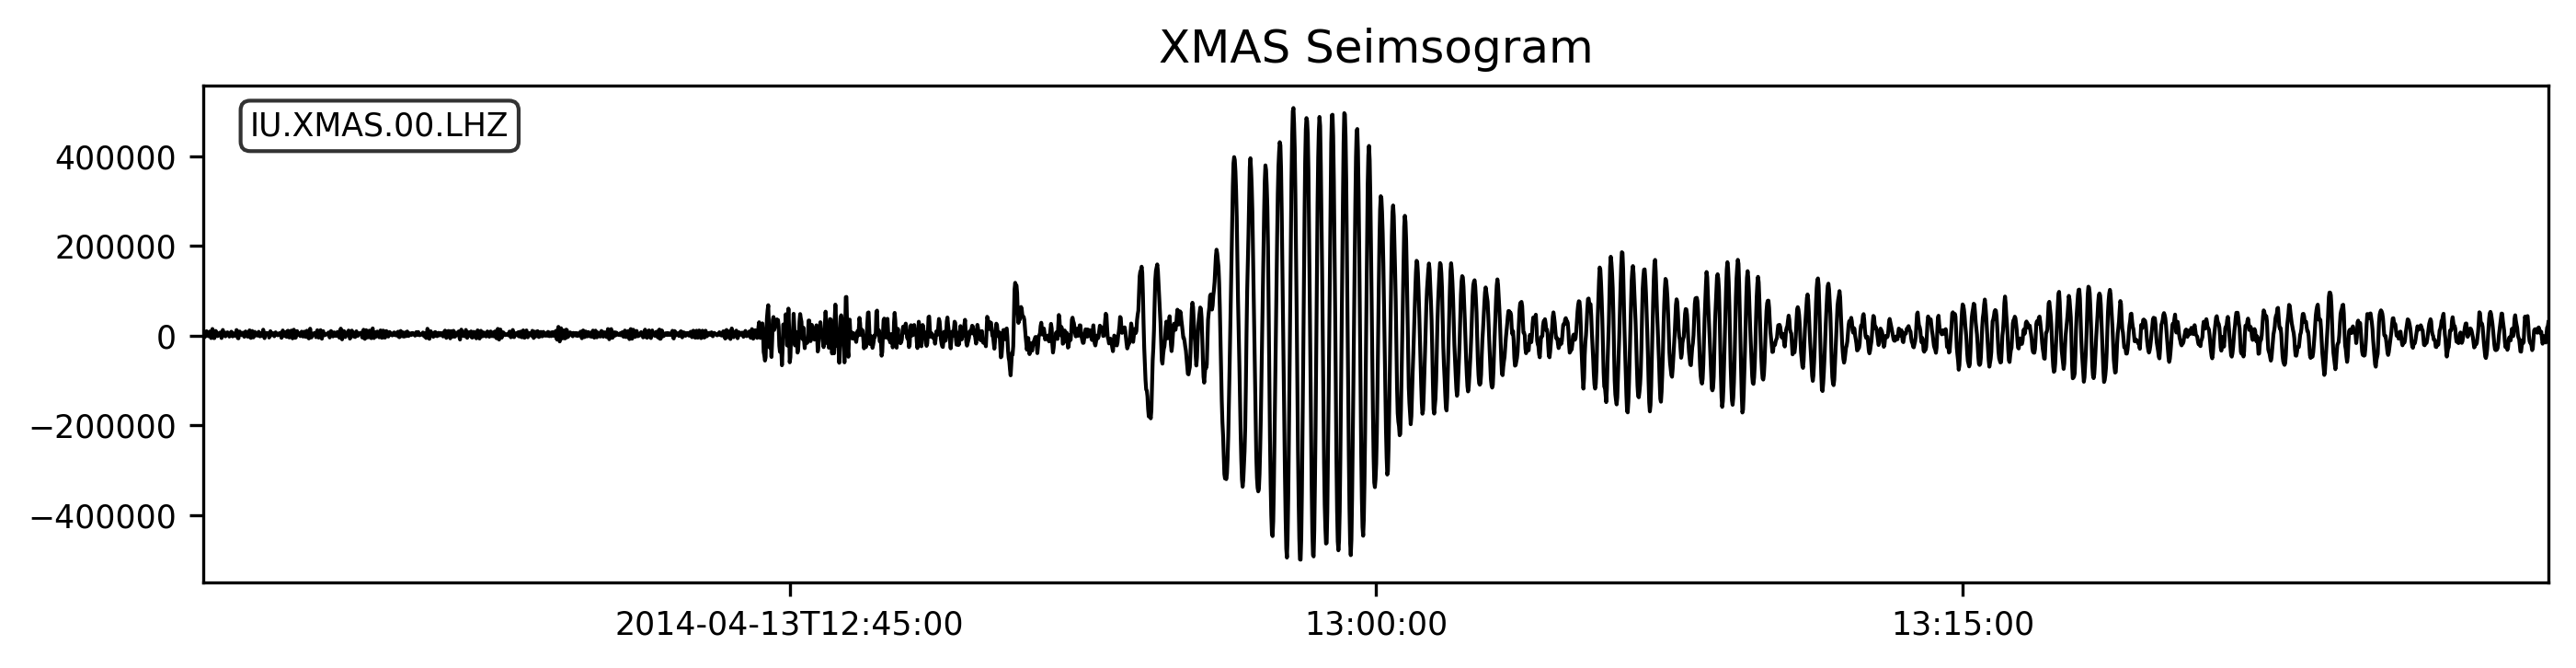

In [92]:
st3 = client.get_waveforms("IU", "XMAS", "00", "LHZ", t1, t2)

arrival_P3 = UTCDateTime('2014-04-13T12:44:14Z')
arrival_PP3 = UTCDateTime('2014-04-13T12:45:55Z')
arrival_S3 = UTCDateTime('2014-04-13T12:50:37Z')
arrival_SS3 = UTCDateTime('2014-04-13T12:53:51Z')

fig = plt.figure(dpi=300, figsize=(10,3))
st3.plot(fig=fig)
ax = fig.gca()
ax.axvline(x=arrival_P3.datetime, label='P', color='blue')
ax.axvline(x=arrival_PP3.datetime, label='PP', color='green')
ax.axvline(x=arrival_S3.datetime, label='S', color='red')
ax.axvline(x=arrival_SS3.datetime, label='SS', color='orange')
plt.legend(loc='lower right')
plt.title('Cropped XMAS Seimsogram')
plt.show()

fig = plt.figure(dpi=300, figsize=(10,3))
st3.plot(fig=fig)
ax = fig.gca()
plt.title('XMAS Seimsogram')
plt.show()

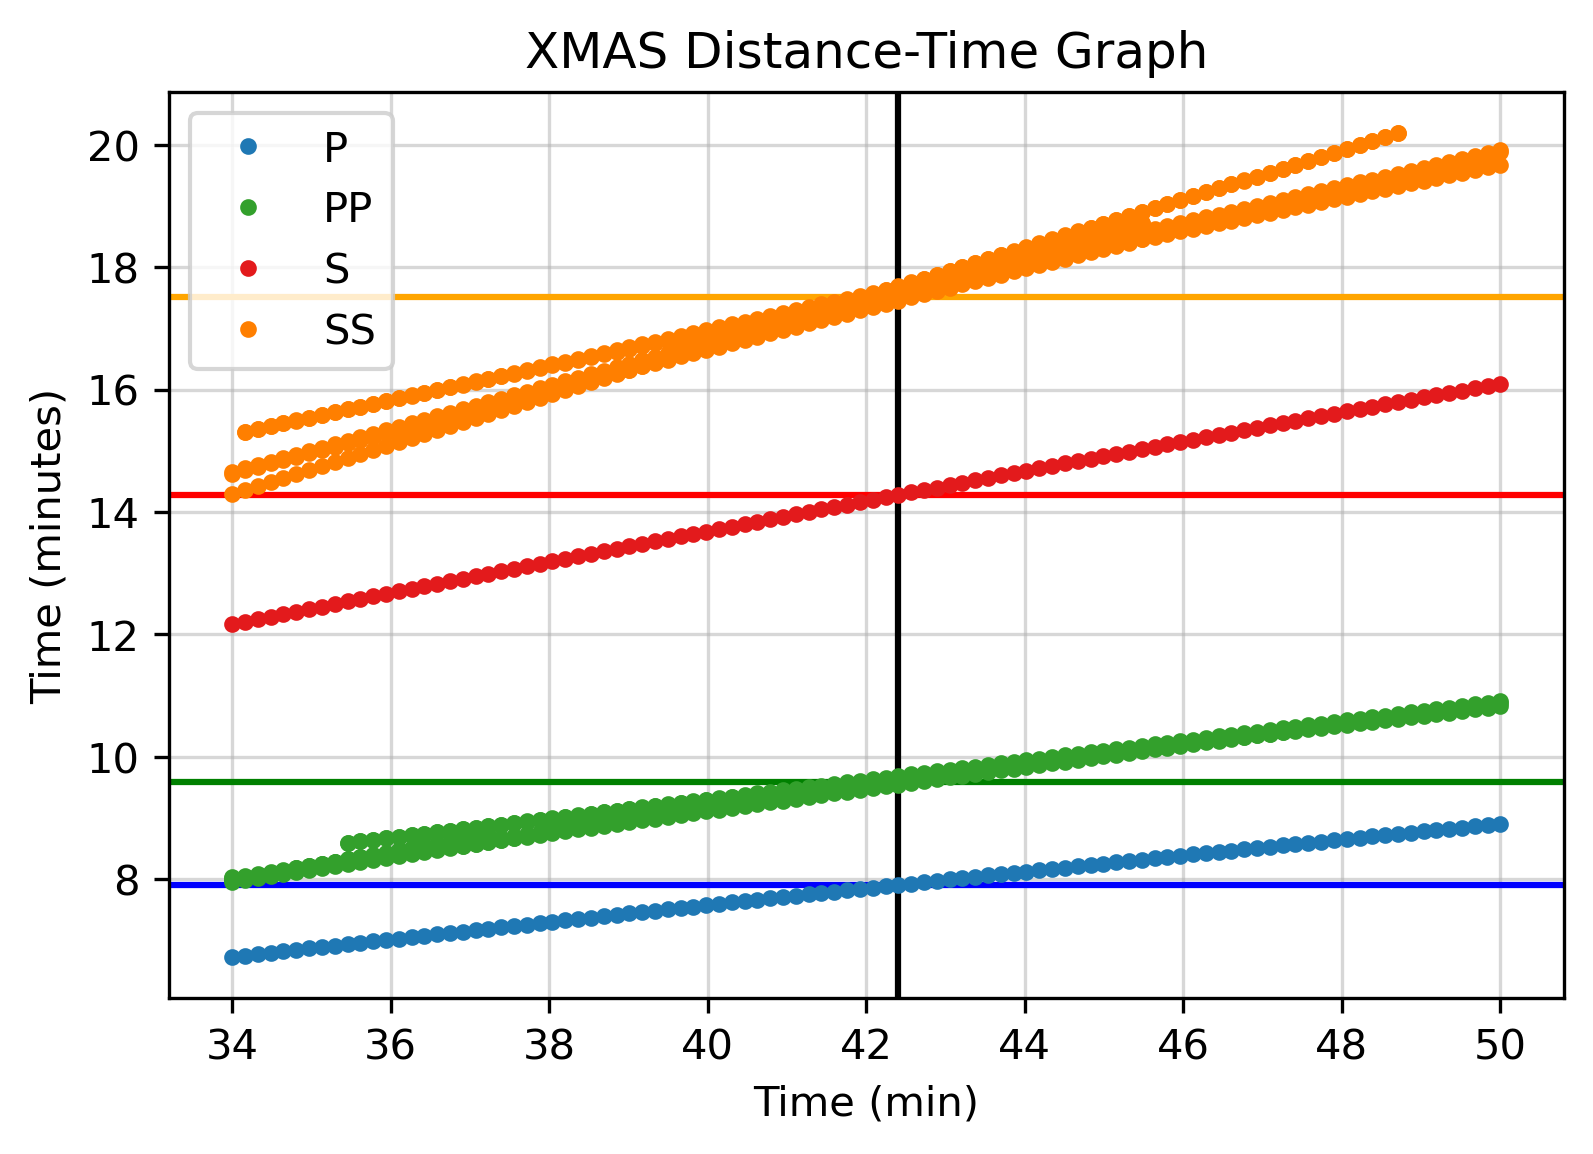

In [93]:
t_0_P3 = 7.9
delta3 = 42.4

t_PP_P3 = (arrival_PP3 - arrival_P3)/60
t_S_PP3 = (arrival_S3 - arrival_PP3)/60
t_SS_S3 = (arrival_SS3 - arrival_S3)/60

fig = plt.figure(dpi=300)
ax = fig.gca()

ax.axhline(y=t_0_P3, color='blue')
ax.axhline(y=t_0_P3+t_PP_P3, color='green')
ax.axhline(y=t_0_P3+t_S_PP3+t_PP_P3, color='red')
ax.axhline(y=t_0_P3+t_S_PP3+t_PP_P3+t_SS_S3, color='orange')

ax.axvline(x=delta3, color='black')

xi = 34
xf = 50
dx = 4

plot_travel_times(source_depth=10, phase_list=['P', 'S', 'SS', 'PP'], npoints=100, min_degrees=xi, max_degrees=xf,\
                  fig=fig, ax=ax, show=False)

'''
yi = 6
yf = 8
dy = 0.5

major_ticksx = np.arange(xi, xf, dx)
minor_ticksx = np.arange(xi, xf, dx/4)
major_ticksy = np.arange(yi, yf, dy)
minor_ticksy = np.arange(yi, yf, dy/4)

ax.set_xticks(major_ticksx)
ax.set_xticks(minor_ticksx, minor=True)
ax.set_yticks(major_ticksy)
ax.set_yticks(minor_ticksy, minor=True)
ax.set_ylim(bottom=6, top=8)
'''

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
plt.title('XMAS Distance-Time Graph')
plt.xlabel('Distance ($^\circ$)')
plt.xlabel('Time (min)')
plt.show()

C:\Users\bayle\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:761: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x0000019F5D3050E0> with the PlateCarree projection.
  warnings.warn('Approximating coordinate system {!r} with the '
C:\Users\bayle\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:761: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x0000019F5C6C84A0> with the PlateCarree projection.
  warnings.warn('Approximating coordinate system {!r} with the '
C:\Users\bayle\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:761: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x0000019F5C6C87C0> with the PlateCarree projection.
  warnings.warn('Approximating coordinate system {!r} with the '


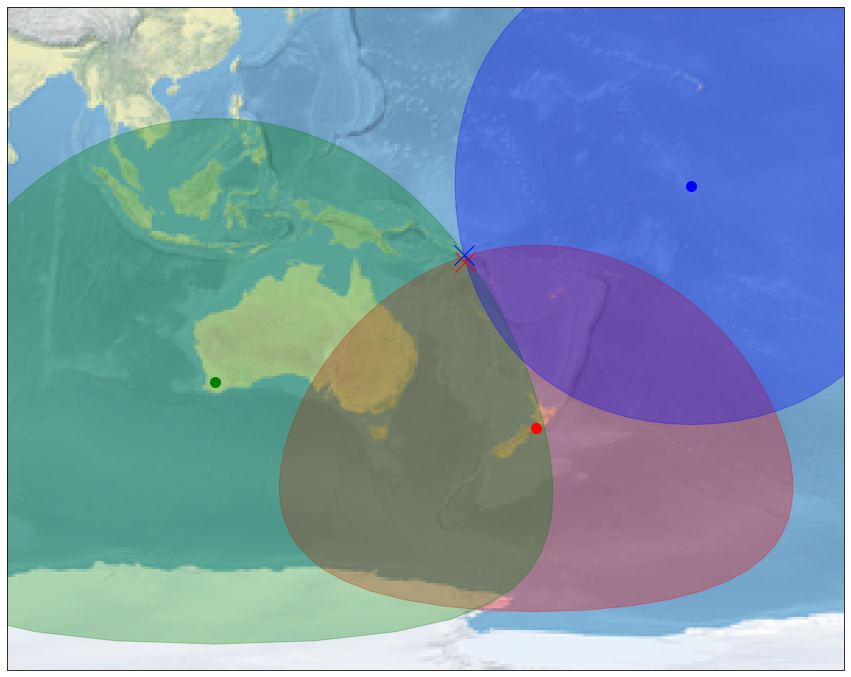

In [94]:
import cartopy.crs as ccrs
from cartopy.geodesic import Geodesic
import shapely

delta3 = 42.4

# Distances, using centre of the Earth to make them real distance rather than radial.
dist = 6371*delta1*np.pi/180
dist2 = 6371*delta2*np.pi/180
dist3 = 6371*delta3*np.pi/180

# Coordinates of SNZO
lon1= 174.7046
lat1= -41.3101
# Coordinates of NWAO
lon2 = 117.239
lat2 = -32.9277
# Coordinates of XMAS
lon3 = -157.4457
lat3 = 2.0448

plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([80,230,10,-70])
ax.stock_img()

# Circles with the relevant radii, according to the determined epicentral distances.
ax.tissot(rad_km=dist, lons=lon1, lats=lat1, alpha=0.3, color='r')
ax.tissot(rad_km=dist2, lons=lon2, lats=lat2, alpha=0.3, color='g')
ax.tissot(rad_km=dist3, lons=lon3, lats=lat3, alpha=0.3, color='b')

plt.plot(lon1,lat1,marker='o',color='red',transform=ccrs.Geodetic(), markersize=10)
plt.plot(lon2, lat2, marker='o',color='green',transform=ccrs.Geodetic(), markersize=10)
plt.plot(lon3, lat3, marker='o',color='blue',transform=ccrs.Geodetic(), markersize=10)

# Real event
plt.plot(162.051,-11.463,marker='x',color='red',transform=ccrs.Geodetic(), markersize=20)
#
plt.plot(161.938,-10.197,marker='x',color='blue',transform=ccrs.Geodetic(), markersize=20)

plt.show()

time = UTCDateTime('2014-04-13T12:43:43')